In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
RANDOM_SEED = 42
BASE = '/content/drive/MyDrive/Univerui/Bakalauras/'

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math

In [ ]:
sns.set(rc={'figure.figsize':(30,8)})
sns.set_style("whitegrid")
colors = sns.color_palette('pastel')[:5]

# Loading data

In [ ]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [ ]:
train_df = pd.read_csv(BASE+'KDDTrain+.txt', sep = ',', encoding='utf-8', names=Columns)
test_df = pd.read_csv(BASE+'KDDTest+.txt', sep=',', encoding='utf-8', names=Columns)

# EDA

In [ ]:
categorical_data=train_df.select_dtypes(include='object')
categorical_features=categorical_data.columns.tolist()

numerical_data = train_df.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

In [ ]:
print(f"Dataset has {len(numerical_features)} numerical and {len(categorical_features)} categorical features")

Dataset has 39 numerical and 4 categorical features


## Descriptive Analysis

### Initial Observations

In [ ]:
train_df.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

    attack  level  
0   normal     20  
1   normal     15  
2  neptune     19  
3   normal     21  
4   normal     21  

[5 rows x 43 columns]

In [ ]:
test_df.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

    attack  level  
0  neptune     21  
1  neptune     21  
2   normal     21  
3    saint     15  
4    mscan     11  

[5 rows x 43 columns]

In [ ]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
test_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
print(f"Training data has {train_df.shape[0]} rows and {test_df.shape[1]} columns")
print(f"Testing data has {test_df.shape[0]} rows and {test_df.shape[1]} columns")

Training data has 125973 rows and 43 columns
Testing data has 22544 rows and 43 columns


In [ ]:
print(f"Training data has total of {train_df.isna().values.sum()} missing values")
print(f"Testing data has total of {test_df.isna().values.sum()} missing values")

Training data has total of 0 missing values
Testing data has total of 0 missing values


In [ ]:
print(f"Training data has total of {train_df.duplicated().sum()} duplicated rows")
print(f"Testing data has total of {test_df.duplicated().sum()} duplicated rows")


Training data has total of 0 duplicated rows
Testing data has total of 0 duplicated rows


### Statistic Summaries of Numeric data

#### Train data

In [ ]:
train_df[categorical_features].describe(include='object').T

count unique     top    freq
protocol_type  125973      3     tcp  102689
service        125973     70    http   40338
flag           125973     11      SF   74945
attack         125973     23  normal   67343

In [ ]:
train_df[numerical_features].describe().T

count          mean           std  min    25%  \
duration                     125973.0    287.144650  2.604515e+03  0.0   0.00   
src_bytes                    125973.0  45566.743000  5.870331e+06  0.0   0.00   
dst_bytes                    125973.0  19779.114421  4.021269e+06  0.0   0.00   
land                         125973.0      0.000198  1.408607e-02  0.0   0.00   
wrong_fragment               125973.0      0.022687  2.535300e-01  0.0   0.00   
urgent                       125973.0      0.000111  1.436603e-02  0.0   0.00   
hot                          125973.0      0.204409  2.149968e+00  0.0   0.00   
num_failed_logins            125973.0      0.001222  4.523914e-02  0.0   0.00   
logged_in                    125973.0      0.395736  4.890101e-01  0.0   0.00   
num_compromised              125973.0      0.279250  2.394204e+01  0.0   0.00   
root_shell                   125973.0      0.001342  3.660284e-02  0.0   0.00   
su_attempted                 125973.0      0.001103  4.515438e-02  0.0   0.00   
num_root                     125973.0      0.302192  2.439962e+01  0.0   0.00   
num_file_creations           125973.0      0.012669  4.839351e-01  0.0   0.00   
num_shells                   125973.0      0.000413  2.218113e-02  0.0   0.00   
num_access_files             125973.0      0.004096  9.936956e-02  0.0   0.00   
num_outbound_cmds            125973.0      0.000000  0.000000e+00  0.0   0.00   
is_host_login                125973.0      0.000008  2.817483e-03  0.0   0.00   
is_guest_login               125973.0      0.009423  9.661233e-02  0.0   0.00   
count                        125973.0     84.107555  1.145086e+02  0.0   2.00   
srv_count                    125973.0     27.737888  7.263584e+01  0.0   2.00   
serror_rate                  125973.0      0.284485  4.464556e-01  0.0   0.00   
srv_serror_rate              125973.0      0.282485  4.470225e-01  0.0   0.00   
rerror_rate                  125973.0      0.119958  3.204355e-01  0.0   0.00   
srv_rerror_rate              125973.0      0.121183  3.236472e-01  0.0   0.00   
same_srv_rate                125973.0      0.660928  4.396229e-01  0.0   0.09   
diff_srv_rate                125973.0      0.063053  1.803144e-01  0.0   0.00   
srv_diff_host_rate           125973.0      0.097322  2.598305e-01  0.0   0.00   
dst_host_count               125973.0    182.148945  9.920621e+01  0.0  82.00   
dst_host_srv_count           125973.0    115.653005  1.107027e+02  0.0  10.00   
dst_host_same_srv_rate       125973.0      0.521242  4.489494e-01  0.0   0.05   
dst_host_diff_srv_rate       125973.0      0.082951  1.889218e-01  0.0   0.00   
dst_host_same_src_port_rate  125973.0      0.148379  3.089971e-01  0.0   0.00   
dst_host_srv_diff_host_rate  125973.0      0.032542  1.125638e-01  0.0   0.00   
dst_host_serror_rate         125973.0      0.284452  4.447841e-01  0.0   0.00   
dst_host_srv_serror_rate     125973.0      0.278485  4.456691e-01  0.0   0.00   
dst_host_rerror_rate         125973.0      0.118832  3.065575e-01  0.0   0.00   
dst_host_srv_rerror_rate     125973.0      0.120240  3.194594e-01  0.0   0.00   
level                        125973.0     19.504060  2.291503e+00  0.0  18.00   

                                50%     75%           max  
duration                       0.00    0.00  4.290800e+04  
src_bytes                     44.00  276.00  1.379964e+09  
dst_bytes                      0.00  516.00  1.309937e+09  
land                           0.00    0.00  1.000000e+00  
wrong_fragment                 0.00    0.00  3.000000e+00  
urgent                         0.00    0.00  3.000000e+00  
hot                            0.00    0.00  7.700000e+01  
num_failed_logins              0.00    0.00  5.000000e+00  
logged_in                      0.00    1.00  1.000000e+00  
num_compromised                0.00    0.00  7.479000e+03  
root_shell                     0.00    0.00  1.000000e+00  
su_attempted                   0.00    0.00  2.000000e+00  
num_root   

#### Test data

In [ ]:
test_df[categorical_features].describe(include='object').T

count unique     top   freq
protocol_type  22544      3     tcp  18880
service        22544     64    http   7853
flag           22544     11      SF  14875
attack         22544     38  normal   9711

In [ ]:
test_df[numerical_features].describe().T

count          mean            std  min  \
duration                     22544.0    218.859076    1407.176612  0.0   
src_bytes                    22544.0  10395.450231  472786.431088  0.0   
dst_bytes                    22544.0   2056.018808   21219.297609  0.0   
land                         22544.0      0.000311       0.017619  0.0   
wrong_fragment               22544.0      0.008428       0.142599  0.0   
urgent                       22544.0      0.000710       0.036473  0.0   
hot                          22544.0      0.105394       0.928428  0.0   
num_failed_logins            22544.0      0.021647       0.150328  0.0   
logged_in                    22544.0      0.442202       0.496659  0.0   
num_compromised              22544.0      0.119899       7.269597  0.0   
root_shell                   22544.0      0.002440       0.049334  0.0   
su_attempted                 22544.0      0.000266       0.021060  0.0   
num_root                     22544.0      0.114665       8.041614  0.0   
num_file_creations           22544.0      0.008738       0.676842  0.0   
num_shells                   22544.0      0.001153       0.048014  0.0   
num_access_files             22544.0      0.003549       0.067829  0.0   
num_outbound_cmds            22544.0      0.000000       0.000000  0.0   
is_host_login                22544.0      0.000488       0.022084  0.0   
is_guest_login               22544.0      0.028433       0.166211  0.0   
count                        22544.0     79.028345     128.539248  0.0   
srv_count                    22544.0     31.124379      89.062532  0.0   
serror_rate                  22544.0      0.102924       0.295367  0.0   
srv_serror_rate              22544.0      0.103635       0.298332  0.0   
rerror_rate                  22544.0      0.238463       0.416118  0.0   
srv_rerror_rate              22544.0      0.235179       0.416215  0.0   
same_srv_rate                22544.0      0.740345       0.412496  0.0   
diff_srv_rate                22544.0      0.094074       0.259138  0.0   
srv_diff_host_rate           22544.0      0.098110       0.253545  0.0   
dst_host_count               22544.0    193.869411      94.035663  0.0   
dst_host_srv_count           22544.0    140.750532     111.783972  0.0   
dst_host_same_srv_rate       22544.0      0.608722       0.435688  0.0   
dst_host_diff_srv_rate       22544.0      0.090540       0.220717  0.0   
dst_host_same_src_port_rate  22544.0      0.132261       0.306268  0.0   
dst_host_srv_diff_host_rate  22544.0      0.019638       0.085394  0.0   
dst_host_serror_rate         22544.0      0.097814       0.273139  0.0   
dst_host_srv_serror_rate     22544.0      0.099426       0.281866  0.0   
dst_host_rerror_rate         22544.0      0.233385       0.387229  0.0   
dst_host_srv_rerror_rate     22544.0      0.226683       0.400875  0.0   
level                        22544.0     18.017965       4.270361  0.0   

                                25%     50%       75%         max  
duration                       0.00    0.00    0.0000     57715.0  
src_bytes                      0.00   54.00  287.0000  62825648.0  
dst_bytes                      0.00   46.00  601.0000   1345927.0  
land                           0.00    0.00    0.0000         1.0  
wrong_fragment                 0.00    0.00    0.0000         3.0  
urgent                         0.00    0.00    0.0000         3.0  
hot                            0.00    0.00    0.0000       101.0  
num_failed_logins              0.00    0.00    0.0000         4.0  
logged_in                      0.00    0.00    1.0000         1.0  
num_compromised                0.00    0.00    0.0000       796.0  
root_shell                     0.00    0.00    0.0000         1.0  
su_attempted                   0.00    0.00    0.0000         2.0  
num_root                       0.00    0.00    0.0000       878.0  
num_file_creations             0.00    0.00    0.0000       100.0  
num_shells                     0.00    0.00    0.0

### Numeric data variance

In [ ]:
train_var = train_df[numerical_features].var()
train_var

duration                       6.783500e+06
src_bytes                      3.446079e+13
dst_bytes                      1.617061e+13
land                           1.984174e-04
wrong_fragment                 6.427745e-02
urgent                         2.063827e-04
hot                            4.622364e+00
num_failed_logins              2.046580e-03
logged_in                      2.391308e-01
num_compromised                5.732214e+02
root_shell                     1.339768e-03
su_attempted                   2.038918e-03
num_root                       5.953414e+02
num_file_creations             2.341932e-01
num_shells                     4.920025e-04
num_access_files               9.874309e-03
num_outbound_cmds              0.000000e+00
is_host_login                  7.938209e-06
is_guest_login                 9.333942e-03
count                          1.311222e+04
srv_count                      5.275965e+03
serror_rate                    1.993226e-01
srv_serror_rate                1

In [ ]:
test_var = test_df[numerical_features].var()
test_var

duration                       1.980146e+06
src_bytes                      2.235270e+11
dst_bytes                      4.502586e+08
land                           3.104213e-04
wrong_fragment                 2.033441e-02
urgent                         1.330286e-03
hot                            8.619786e-01
num_failed_logins              2.259843e-02
logged_in                      2.466703e-01
num_compromised                5.284704e+01
root_shell                     2.433829e-03
su_attempted                   4.435258e-04
num_root                       6.466755e+01
num_file_creations             4.581146e-01
num_shells                     2.305373e-03
num_access_files               4.600812e-03
num_outbound_cmds              0.000000e+00
is_host_login                  4.877183e-04
is_guest_login                 2.762606e-02
count                          1.652234e+04
srv_count                      7.932135e+03
serror_rate                    8.724158e-02
srv_serror_rate                8

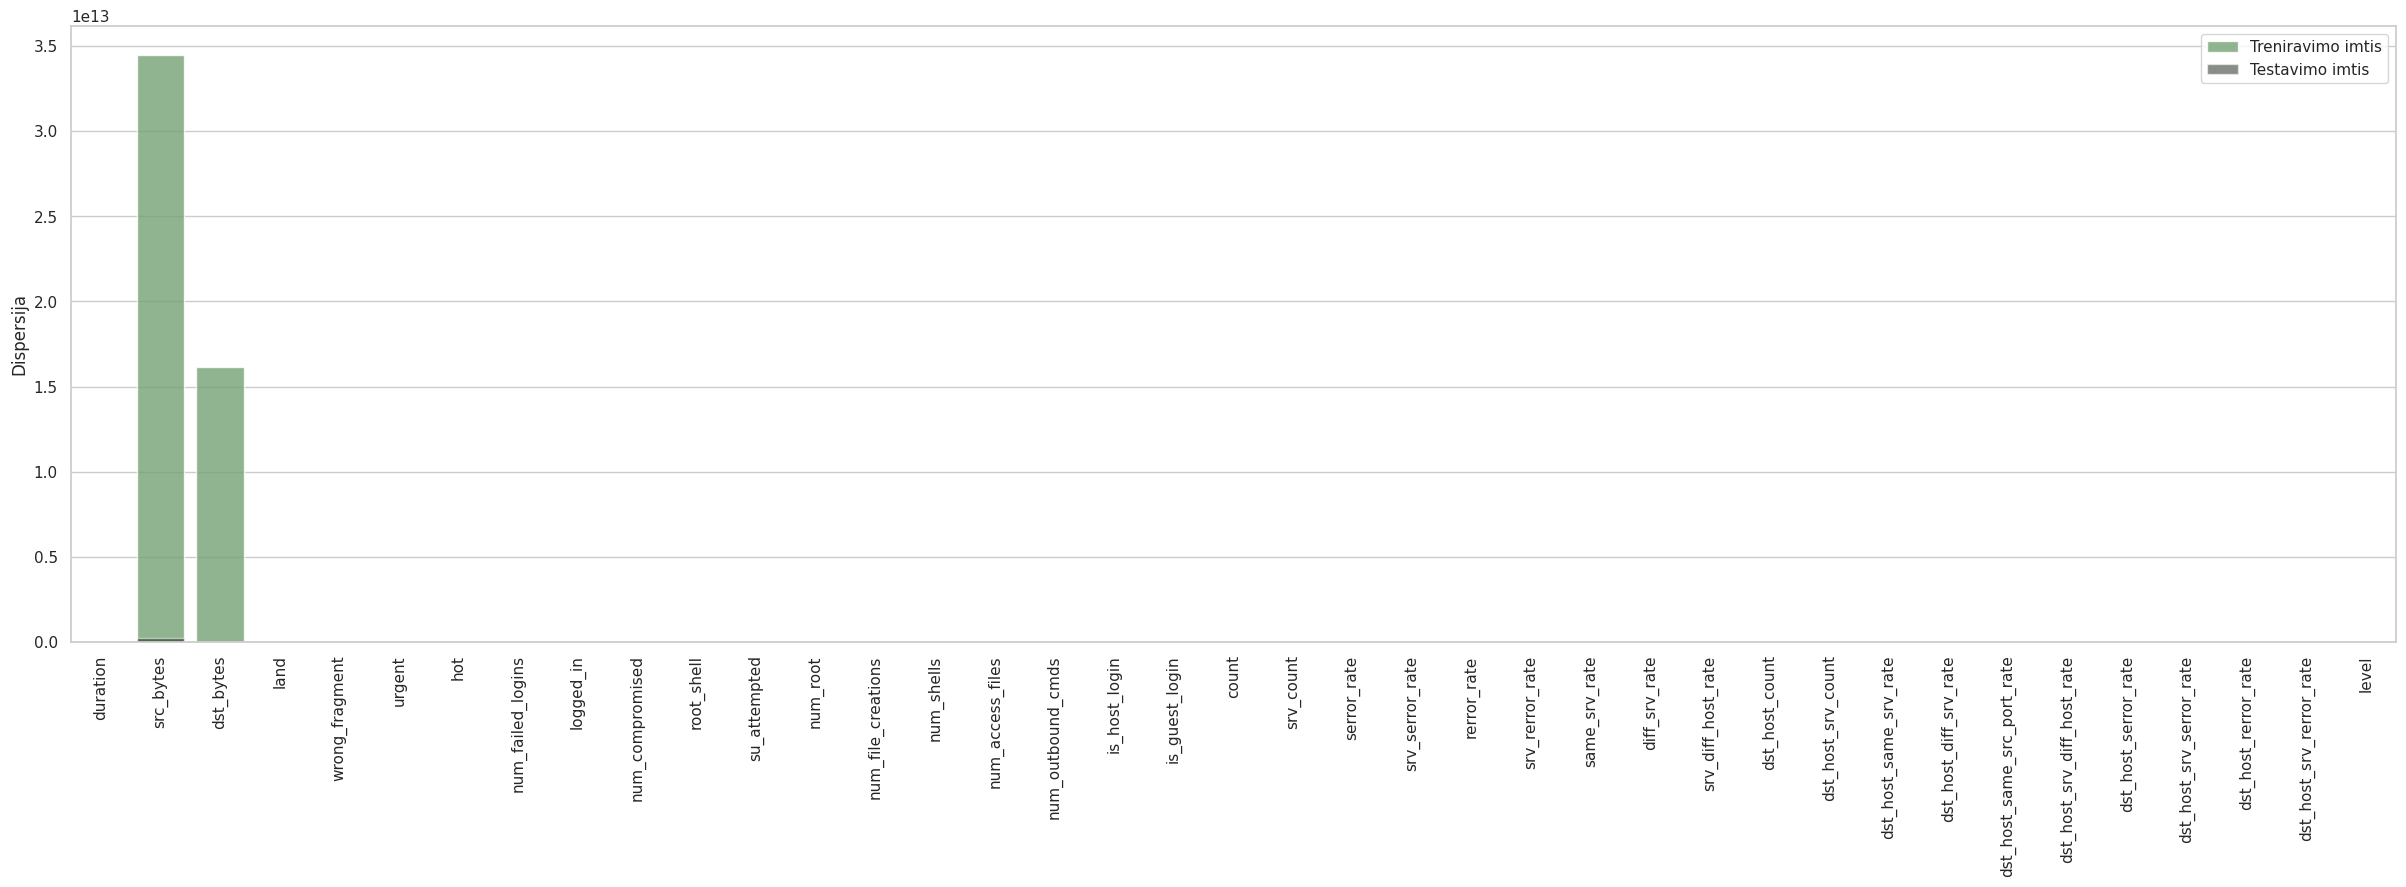

In [ ]:
sns.barplot(x=train_var.index, y=train_var.values, color='#6eaa6b', alpha=0.8, label='Treniravimo imtis')
sns.barplot(x=test_var.index, y=test_var.values, color='#121f11', alpha=0.5, label='Testavimo imtis')
plt.xticks(rotation=90)
plt.ylabel('Dispersija')
plt.legend()
plt.show()

<ipython-input-11-b860a0568863>:1: RuntimeWarning: divide by zero encountered in log
  sns.barplot(x=train_var.index, y=np.log(train_var.values), color='#6eaa6b', alpha=0.8, label='Treniravimo imtis')
<ipython-input-11-b860a0568863>:2: RuntimeWarning: divide by zero encountered in log
  sns.barplot(x=test_var.index, y=np.log(test_var.values), color='#121f11', alpha=0.5, label='Testavimo imtis')


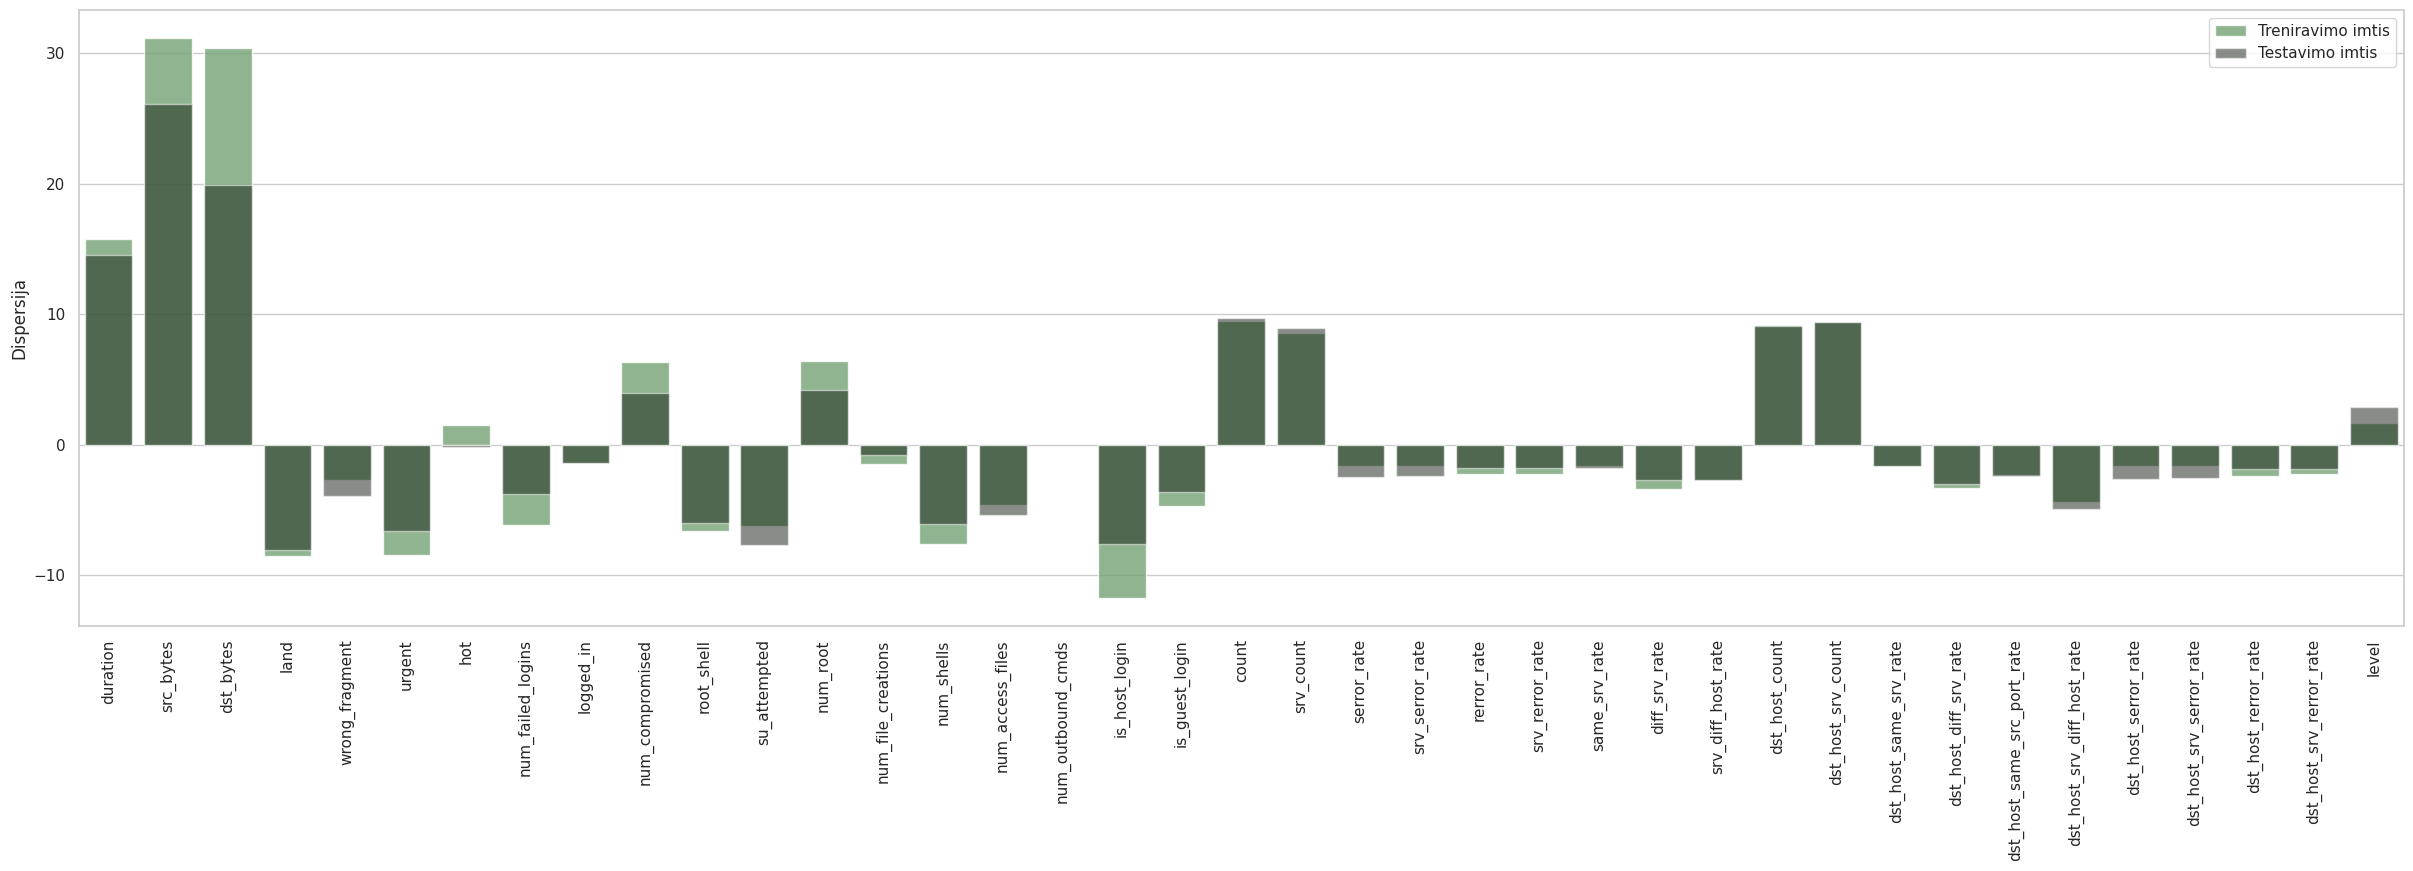

In [ ]:
sns.barplot(x=train_var.index, y=np.log(train_var.values), color='#6eaa6b', alpha=0.8, label='Treniravimo imtis')
sns.barplot(x=test_var.index, y=np.log(test_var.values), color='#121f11', alpha=0.5, label='Testavimo imtis')
plt.xticks(rotation=90)
plt.ylabel('Dispersija')
plt.legend()
plt.show()

### Numerical feature skewness

In [ ]:
train_skew = train_df[numerical_features].skew()
train_skew

duration                        11.880230
src_bytes                      190.669347
dst_bytes                      290.052911
land                            70.965063
wrong_fragment                  11.457988
urgent                         149.914509
hot                             12.589886
num_failed_logins               53.764424
logged_in                        0.426437
num_compromised                250.107883
root_shell                      27.247411
su_attempted                    42.435591
num_root                       236.913724
num_file_creations              55.665341
num_shells                      59.592151
num_access_files                45.554961
num_outbound_cmds                0.000000
is_host_login                  354.926753
is_guest_login                  10.155746
count                            1.514275
srv_count                        4.694162
serror_rate                      0.963201
srv_serror_rate                  0.970597
rerror_rate                      2

In [ ]:
test_skew = test_df[numerical_features].skew()
test_skew

duration                        15.452797
src_bytes                      117.485536
dst_bytes                       47.502505
land                            56.727418
wrong_fragment                  19.252929
urgent                          58.459562
hot                             63.456582
num_failed_logins                7.739911
logged_in                        0.232768
num_compromised                 91.496895
root_shell                      20.172940
su_attempted                    85.453186
num_root                        91.225425
num_file_creations             143.239592
num_shells                      65.657216
num_access_files                25.715871
num_outbound_cmds                0.000000
is_host_login                   45.240771
is_guest_login                   5.674821
count                            1.909295
srv_count                        4.354429
serror_rate                      2.651837
srv_serror_rate                  2.623474
rerror_rate                      1

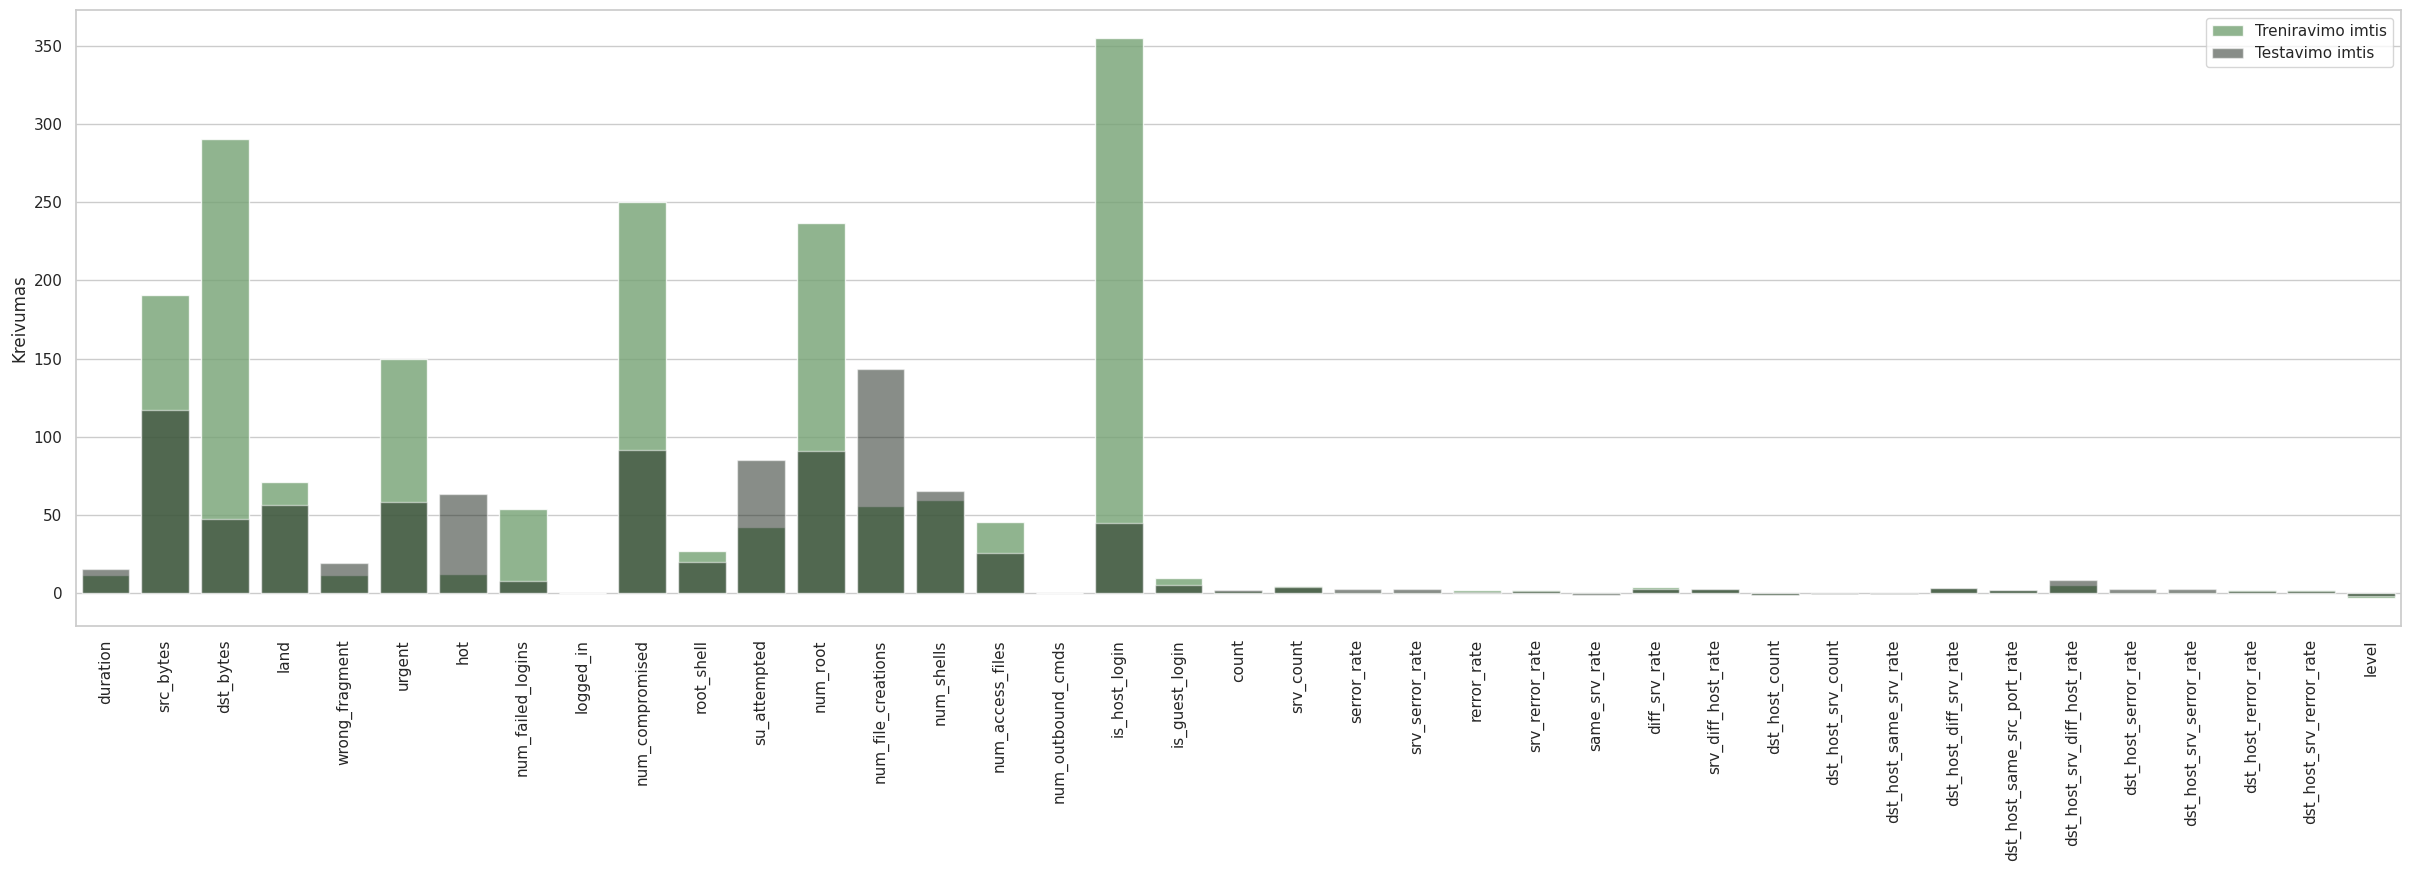

In [ ]:
sns.barplot(x=train_skew.index, y=train_skew.values, color='#6eaa6b', alpha=0.8, label='Treniravimo imtis')
sns.barplot(x=test_skew.index, y=test_skew.values, color='#121f11', alpha=0.5, label='Testavimo imtis')
plt.xticks(rotation=90)
plt.ylabel('Kreivumas')
plt.legend()
plt.show()

### Checking unique values

In [ ]:
print(f"Column protocol_type\tTrain: {train_df['protocol_type'].nunique()}; Test {test_df['protocol_type'].nunique()}")
print(f"Column service\tTrain: {train_df['service'].nunique()}; Test {test_df['service'].nunique()}")
print(f"Column flag\tTrain: {train_df['flag'].nunique()}; Test {test_df['flag'].nunique()}")
print(f"Column attack\tTrain: {train_df['attack'].nunique()}; Test {test_df['attack'].nunique()}")
print()
print(f"Column land\tTrain: {train_df['land'].nunique()}; Test {test_df['land'].nunique()}")
print(f"Column logged_in\tTrain: {train_df['logged_in'].nunique()}; Test {test_df['logged_in'].nunique()}")
print(f"Column root_shell\tTrain: {train_df['root_shell'].nunique()}; Test {test_df['root_shell'].nunique()}")
print(f"Column is_host_login\tTrain: {train_df['is_host_login'].nunique()}; Test {test_df['is_host_login'].nunique()}")
print(f"Column is_guest_login\tTrain: {train_df['is_guest_login'].nunique()}; Test {test_df['is_guest_login'].nunique()}")
print()
print(f"Column serror_rate\tTrain: {train_df['serror_rate'].nunique()}; Test {test_df['serror_rate'].nunique()}")
print(f"Column srv_serror_rate\tTrain: {train_df['srv_serror_rate'].nunique()}; Test {test_df['srv_serror_rate'].nunique()}")
print(f"Column rerror_rate\tTrain: {train_df['rerror_rate'].nunique()}; Test {test_df['rerror_rate'].nunique()}")
print(f"Column srv_rerror_rate\tTrain: {train_df['srv_rerror_rate'].nunique()}; Test {test_df['srv_rerror_rate'].nunique()}")
print(f"Column same_srv_rate\tTrain: {train_df['same_srv_rate'].nunique()}; Test {test_df['same_srv_rate'].nunique()}")
print(f"Column diff_srv_rate\tTrain: {train_df['diff_srv_rate'].nunique()}; Test {test_df['diff_srv_rate'].nunique()}")
print(f"Column srv_diff_host_rate\tTrain: {train_df['srv_diff_host_rate'].nunique()}; Test {test_df['srv_diff_host_rate'].nunique()}")
print(f"Column dst_host_same_srv_rate\tTrain: {train_df['dst_host_same_srv_rate'].nunique()}; Test {test_df['dst_host_same_srv_rate'].nunique()}")
print(f"Column dst_host_diff_srv_rate\tTrain: {train_df['dst_host_diff_srv_rate'].nunique()}; Test {test_df['dst_host_diff_srv_rate'].nunique()}")
print(f"Column dst_host_same_src_port_rate\tTrain: {train_df['dst_host_same_src_port_rate'].nunique()}; Test {test_df['dst_host_same_src_port_rate'].nunique()}")
print(f"Column dst_host_srv_diff_host_rate\tTrain: {train_df['dst_host_srv_diff_host_rate'].nunique()}; Test {test_df['dst_host_srv_diff_host_rate'].nunique()}")
print(f"Column dst_host_serror_rate\tTrain: {train_df['dst_host_serror_rate'].nunique()}; Test {test_df['dst_host_serror_rate'].nunique()}")
print(f"Column dst_host_rerror_rate\tTrain: {train_df['dst_host_rerror_rate'].nunique()}; Test {test_df['dst_host_rerror_rate'].nunique()}")
print(f"Column dst_host_srv_rerror_rate\tTrain: {train_df['dst_host_srv_rerror_rate'].nunique()}; Test {test_df['dst_host_srv_rerror_rate'].nunique()}")

Column protocol_type	Train: 3; Test 3
Column service	Train: 70; Test 64
Column flag	Train: 11; Test 11
Column attack	Train: 23; Test 38

Column land	Train: 2; Test 2
Column logged_in	Train: 2; Test 2
Column root_shell	Train: 2; Test 2
Column is_host_login	Train: 2; Test 2
Column is_guest_login	Train: 2; Test 2

Column serror_rate	Train: 89; Test 88
Column srv_serror_rate	Train: 86; Test 82
Column rerror_rate	Train: 82; Test 90
Column srv_rerror_rate	Train: 62; Test 93
Column same_srv_rate	Train: 101; Test 75
Column diff_srv_rate	Train: 95; Test 99
Column srv_diff_host_rate	Train: 60; Test 84
Column dst_host_same_srv_rate	Train: 101; Test 101
Column dst_host_diff_srv_rate	Train: 101; Test 101
Column dst_host_same_src_port_rate	Train: 101; Test 101
Column dst_host_srv_diff_host_rate	Train: 75; Test 58
Column dst_host_serror_rate	Train: 101; Test 99
Column dst_host_rerror_rate	Train: 101; Test 101
Column dst_host_srv_rerror_rate	Train: 101; Test 100


In [ ]:
len(train_df['attack'].unique())

23

In [ ]:
len(test_df['attack'].unique())

38

In [ ]:
def attack_binarization(row):
  if row['attack'] == 'normal':
    return 'normal'
  else:
    return 'attack'

train_df['attack_binary'] = train_df.apply(lambda row: attack_binarization(row), axis=1)

In [ ]:
test_df['attack_binary'] = test_df.apply(lambda row: attack_binarization(row), axis=1)

## Visualisations

### Target

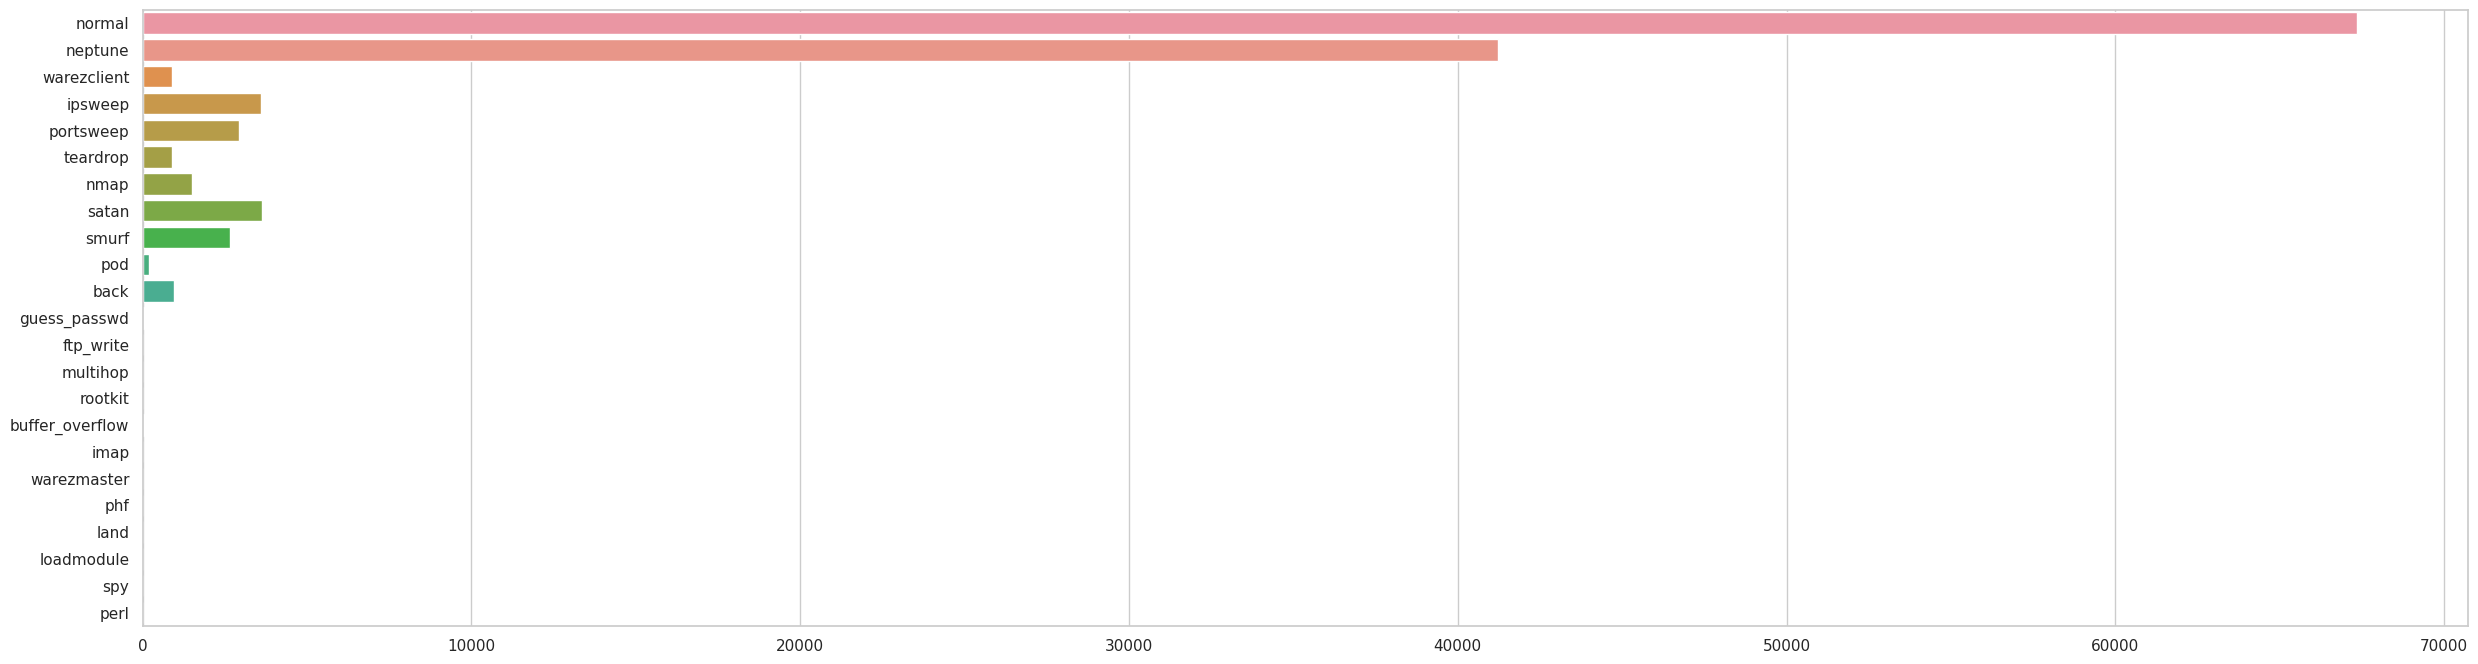

In [ ]:
sns.countplot(y=train_df.attack)
plt.xlabel('')
plt.ylabel('')
plt.show()

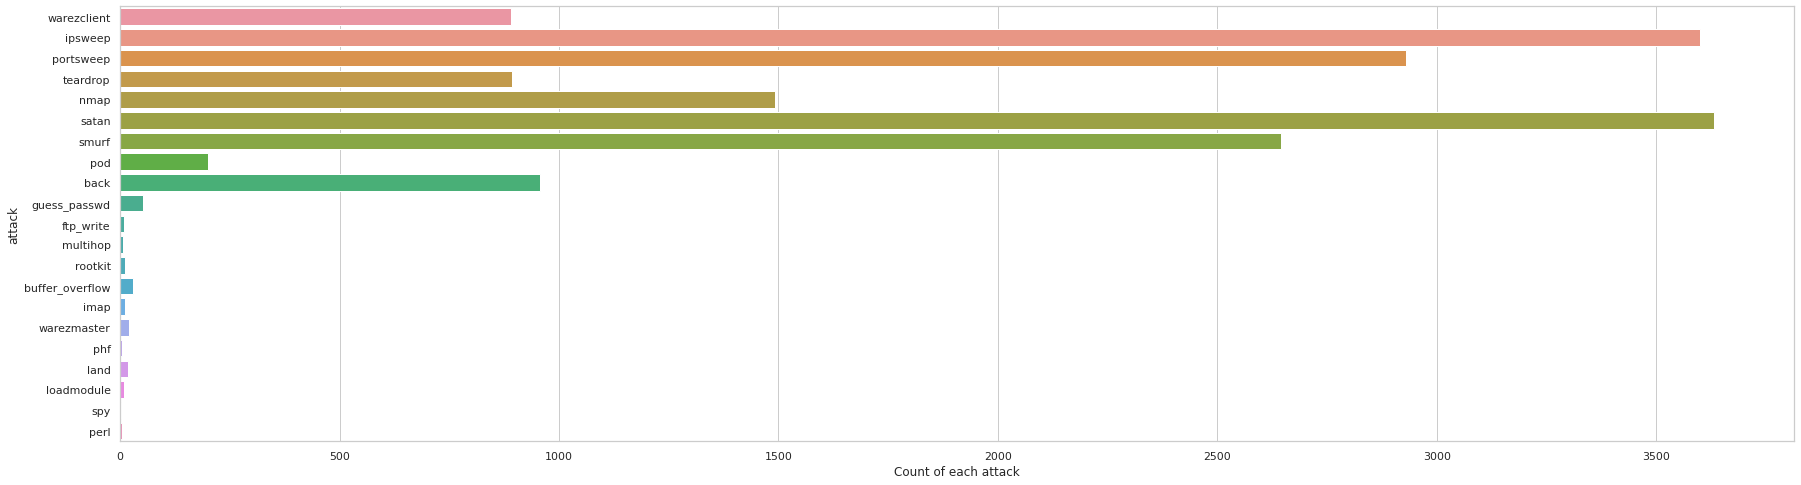

In [ ]:
ignore_top_2 = ['normal', 'neptune']
sns.countplot(y=train_df[~train_df.attack.isin(ignore_top_2)].attack)
plt.xlabel('Count of each attack')
plt.show()

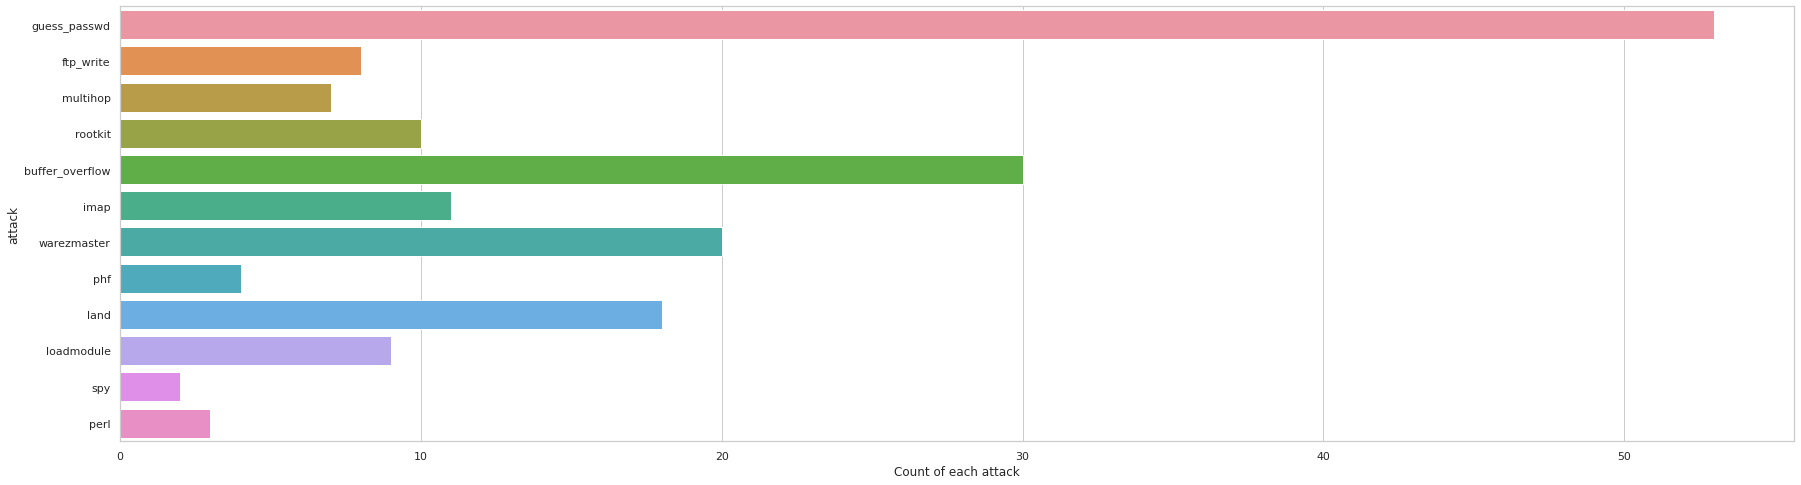

In [ ]:
ignore_top_ = ['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
                 'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back']
sns.countplot(y=train_df[~train_df.attack.isin(ignore_top_)].attack)
plt.xlabel('Count of each attack')
plt.show()

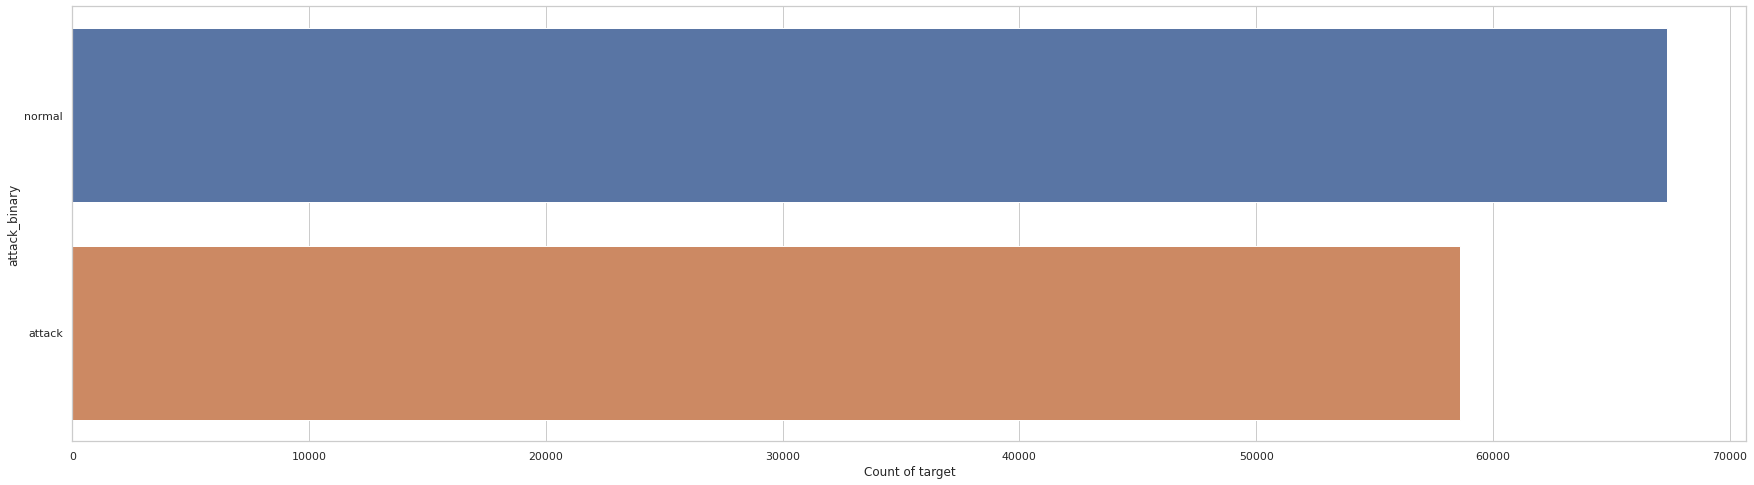

In [ ]:
sns.countplot(y=train_df.attack_binary)
plt.xlabel('Count of target')
plt.show()

### Numeric feature ralation with target

In [ ]:
n_cols = 3
n_rows = math.ceil(len(numerical_features)/n_cols)
n_cols, n_rows, len(numerical_features), n_cols*n_rows

(3, 13, 39, 39)

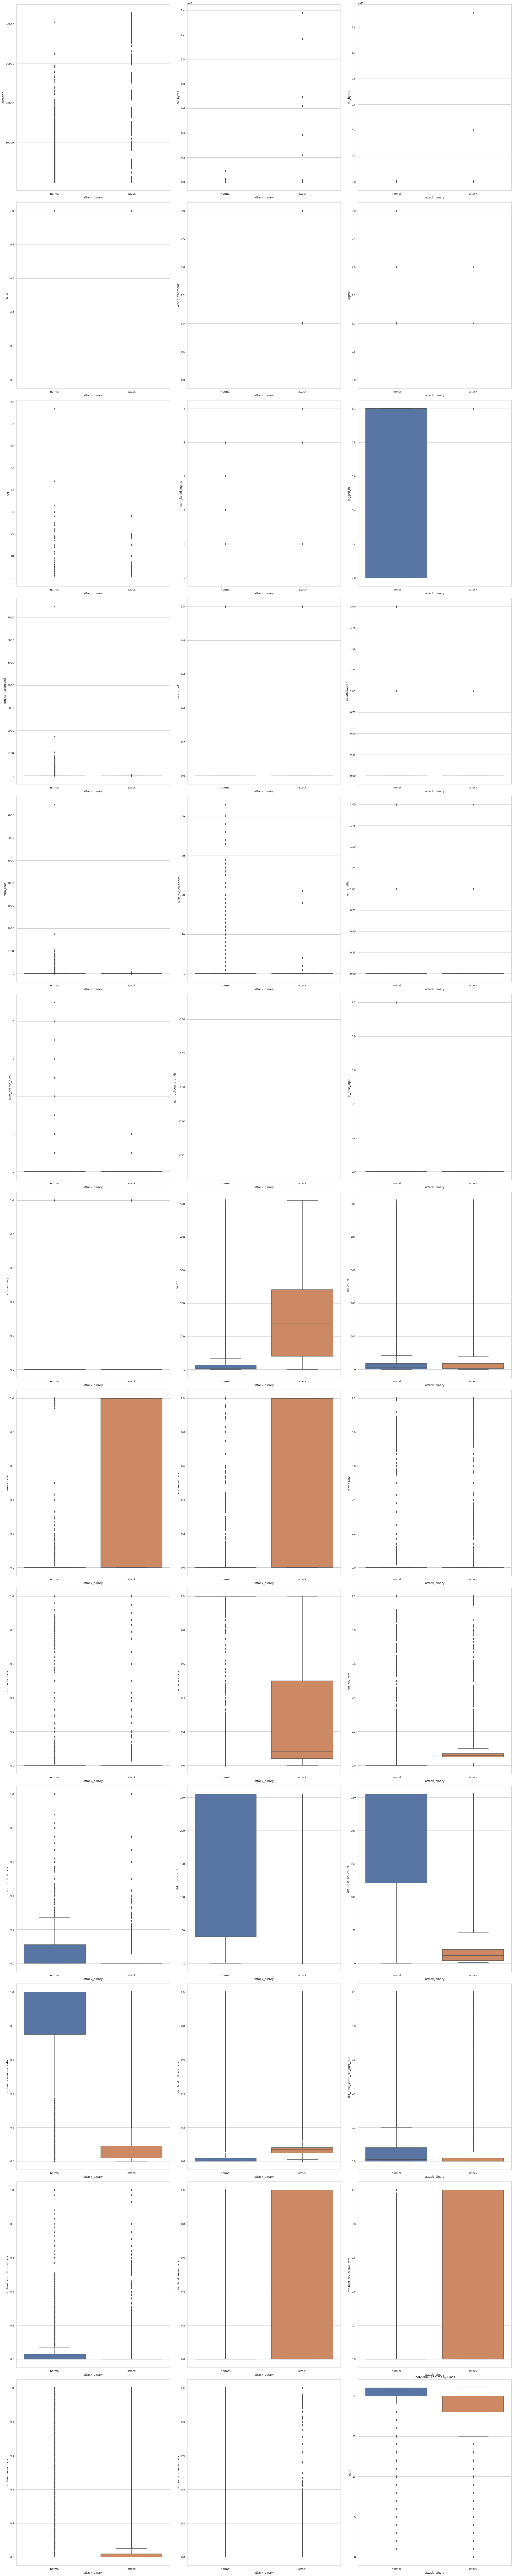

In [ ]:
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(30,150))
row = 0
col = 0
for i in numerical_features:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = train_df['attack_binary'], y = numerical_data[i], ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

### Categorical features

#### Protocol type

In [ ]:
pt_tr = train_df.protocol_type.value_counts()
pt_te = test_df.protocol_type.value_counts()

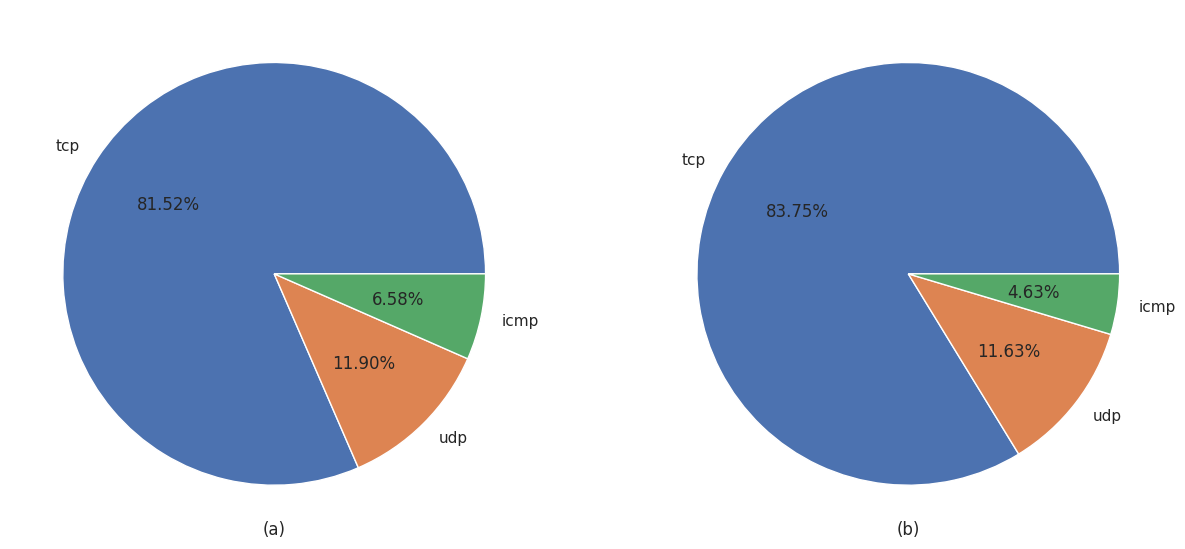

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.pie(pt_tr.values, labels=pt_tr.index, autopct='%.2f%%')
ax1.set_title('(a)', y=-0.01)

ax2.pie(pt_te.values, labels=pt_te.index, autopct='%.2f%%')
ax2.set_title('(b)', y=-0.01)

plt.show()

#### Logged_in

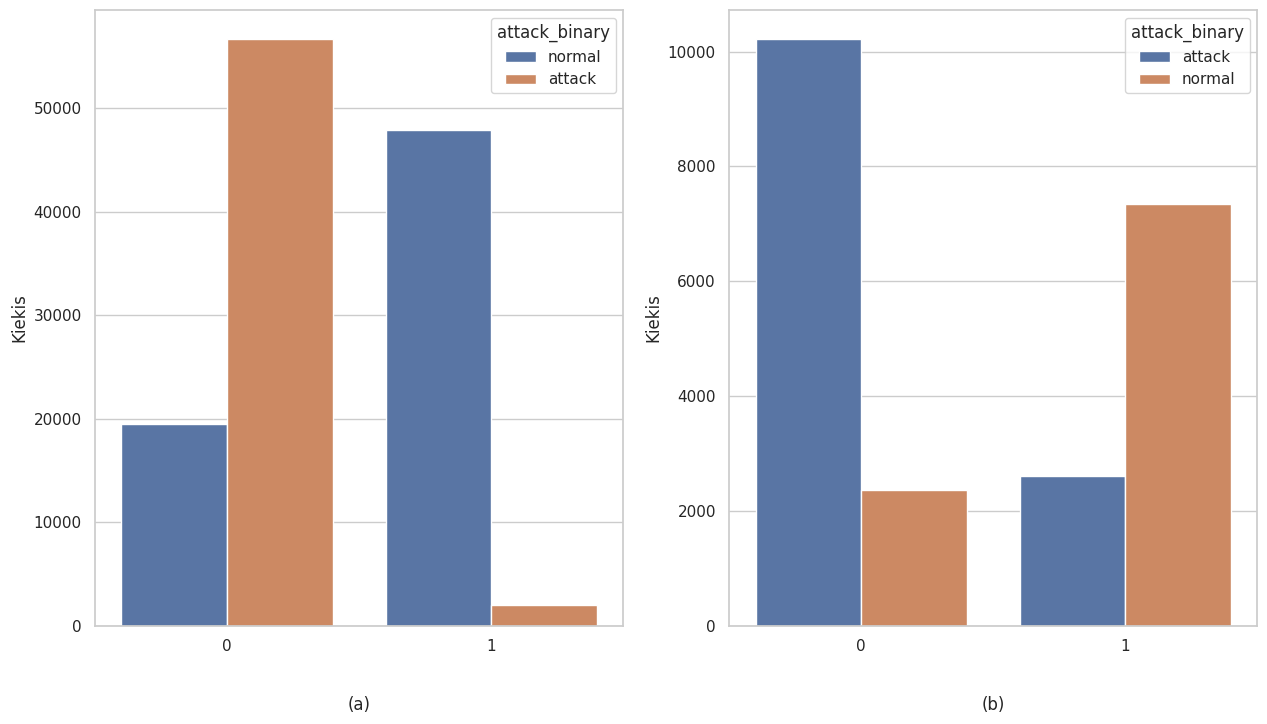

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(x=train_df['logged_in'], hue=train_df['attack_binary'],ax=ax1)
ax1.set_title("(a)", y=-0.15)
ax1.set_xlabel("")
ax1.set_ylabel("Kiekis")
sns.countplot(x=test_df['logged_in'],hue=test_df['attack_binary'], ax=ax2)
ax2.set_title("(b)", y=-0.15)
ax2.set_xlabel("")
ax2.set_ylabel("Kiekis")

plt.show()

#### Land

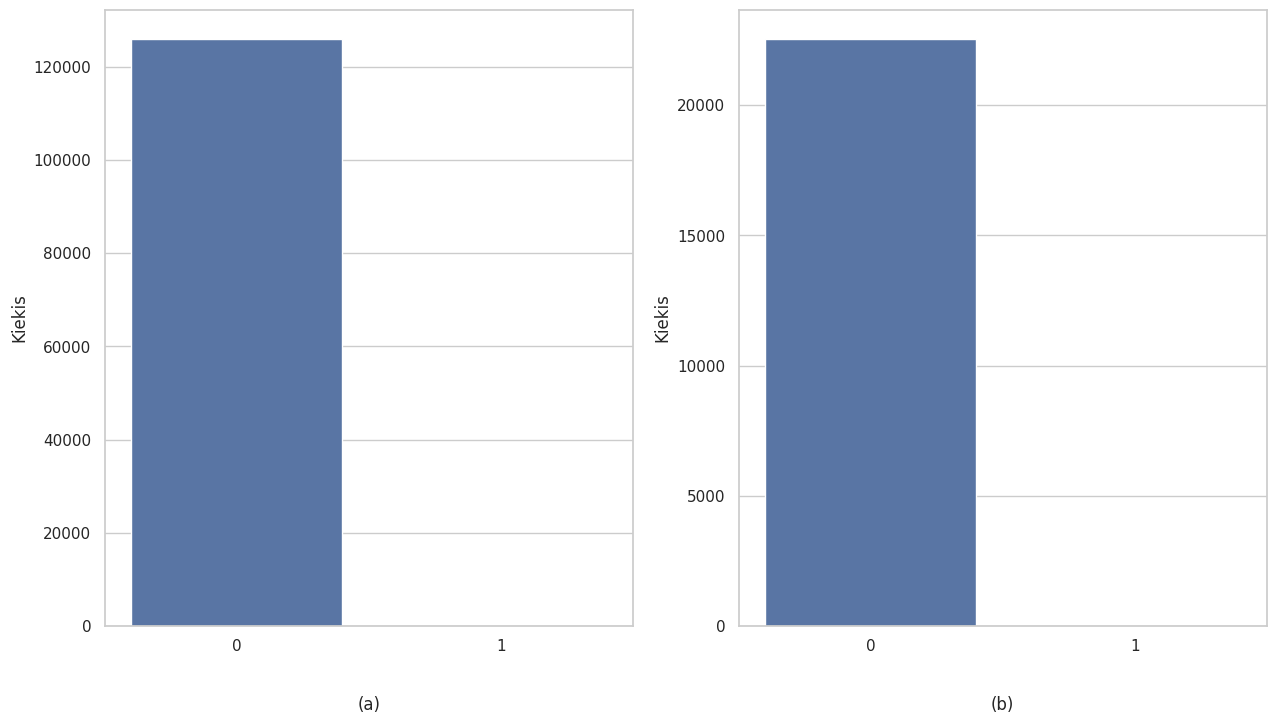

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(x=train_df['land'], ax=ax1)
ax1.set_title("(a)", y=-0.15)
ax1.set_xlabel("")
ax1.set_ylabel("Kiekis")
sns.countplot(x=test_df['land'], ax=ax2)
ax2.set_title("(b)", y=-0.15)
ax2.set_xlabel("")
ax2.set_ylabel("Kiekis")

plt.show()

In [ ]:
print(f"Feature 'land' in training dataset has:")
print(train_df.land.value_counts())
print()
print(f"Feature 'land' in testing dataset has:")
print(test_df.land.value_counts())

Feature 'land' in training dataset has:
0    125948
1        25
Name: land, dtype: int64

Feature 'land' in testing dataset has:
0    22537
1        7
Name: land, dtype: int64


#### root_shell

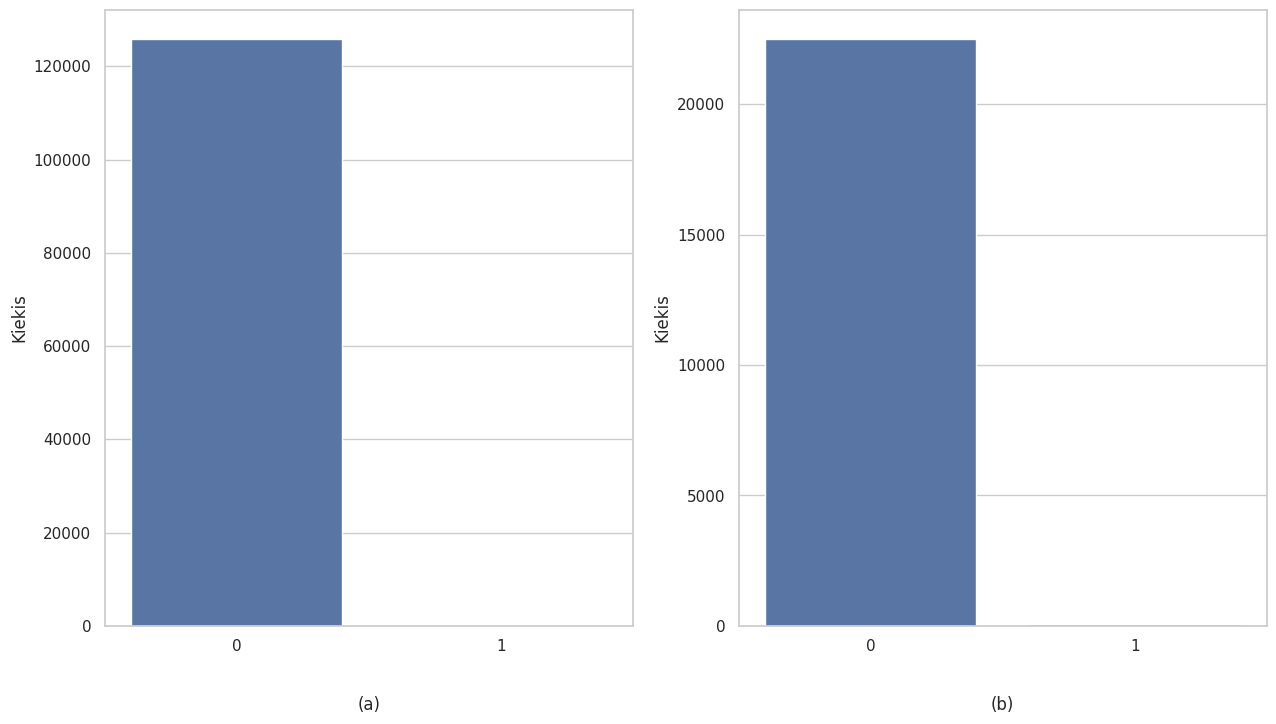

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(x=train_df['root_shell'], ax=ax1)
ax1.set_title("(a)", y=-0.15)
ax1.set_xlabel("")
ax1.set_ylabel("Kiekis")
sns.countplot(x=test_df['root_shell'], ax=ax2)
ax2.set_title("(b)", y=-0.15)
ax2.set_xlabel("")
ax2.set_ylabel("Kiekis")

plt.show()

In [ ]:
print(f"Feature 'land' in training dataset has:")
print(train_df.root_shell.value_counts())
print()
print(f"Feature 'land' in testing dataset has:")
print(test_df.root_shell.value_counts())

Feature 'land' in training dataset has:
0    125804
1       169
Name: root_shell, dtype: int64

Feature 'land' in testing dataset has:
0    22489
1       55
Name: root_shell, dtype: int64


#### is_host_login

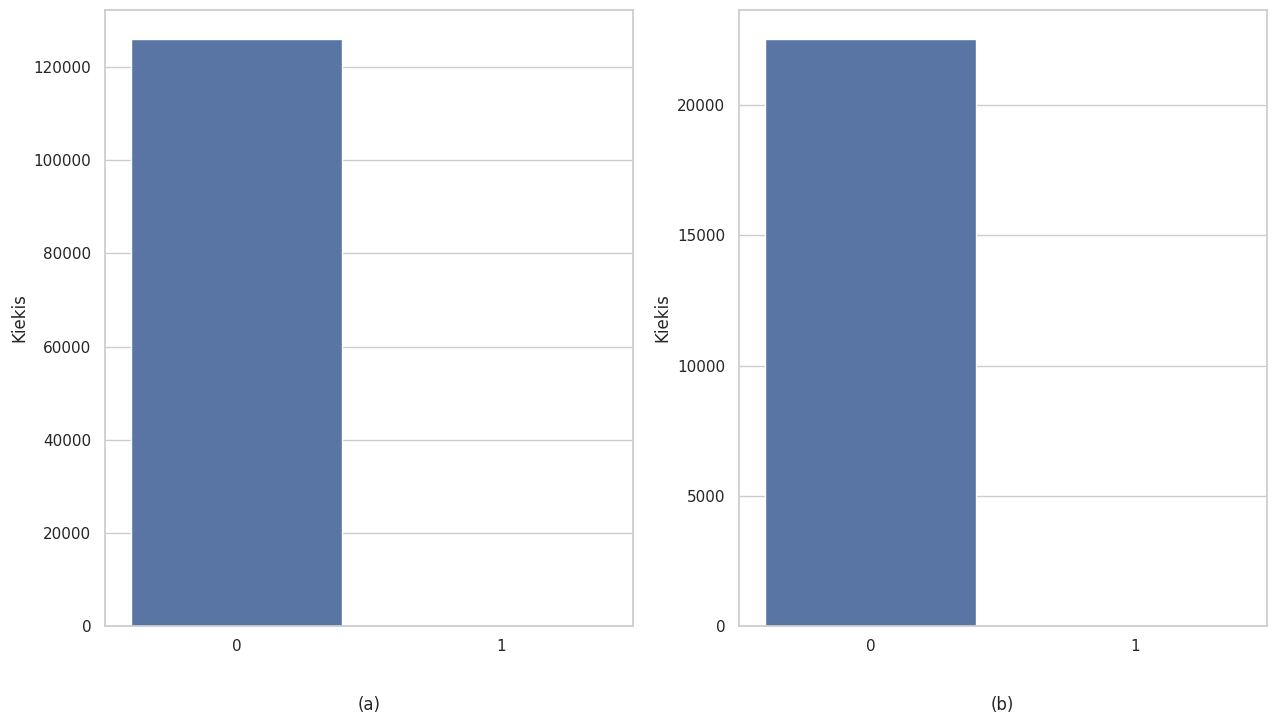

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(x=train_df['is_host_login'], ax=ax1)
ax1.set_title("(a)", y=-0.15)
ax1.set_xlabel("")
ax1.set_ylabel("Kiekis")
sns.countplot(x=test_df['is_host_login'], ax=ax2)
ax2.set_title("(b)", y=-0.15)
ax2.set_xlabel("")
ax2.set_ylabel("Kiekis")

plt.show()

In [ ]:
print(f"Feature 'land' in training dataset has:")
print(train_df.is_host_login.value_counts())
print()
print(f"Feature 'land' in testing dataset has:")
print(test_df.is_host_login.value_counts())

Feature 'land' in training dataset has:
0    125972
1         1
Name: is_host_login, dtype: int64

Feature 'land' in testing dataset has:
0    22533
1       11
Name: is_host_login, dtype: int64


#### is_guest_login

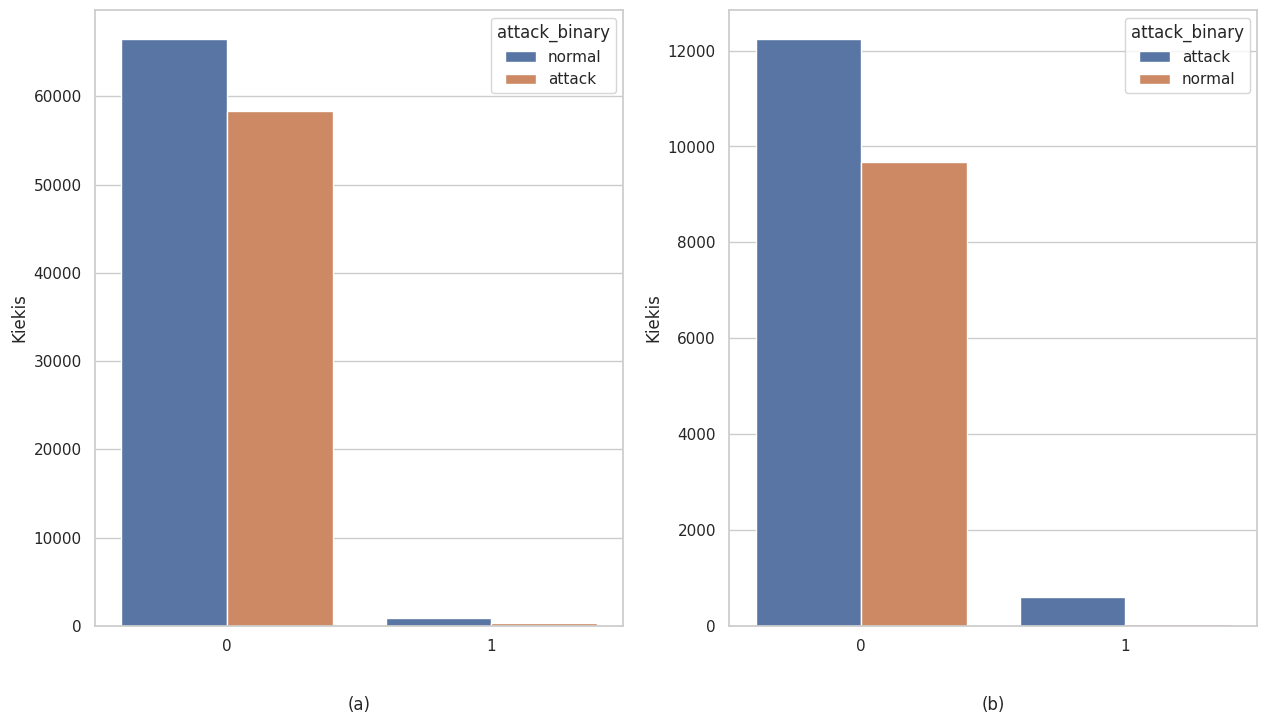

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(x=train_df['is_guest_login'], hue=train_df['attack_binary'], ax=ax1)
ax1.set_title("(a)", y=-0.15)
ax1.set_xlabel("")
ax1.set_ylabel("Kiekis")
sns.countplot(x=test_df['is_guest_login'], hue=test_df['attack_binary'], ax=ax2)
ax2.set_title("(b)", y=-0.15)
ax2.set_xlabel("")
ax2.set_ylabel("Kiekis")

plt.show()

In [ ]:
print(f"Feature 'land' in training dataset has:")
print(train_df.is_guest_login.value_counts())
print()
print(f"Feature 'land' in testing dataset has:")
print(test_df.is_guest_login.value_counts())

Feature 'land' in training dataset has:
0    124786
1      1187
Name: is_guest_login, dtype: int64

Feature 'land' in testing dataset has:
0    21903
1      641
Name: is_guest_login, dtype: int64


#### flag

In [ ]:
fl_tr = train_df.flag.value_counts()
fl_te = train_df.flag.value_counts()

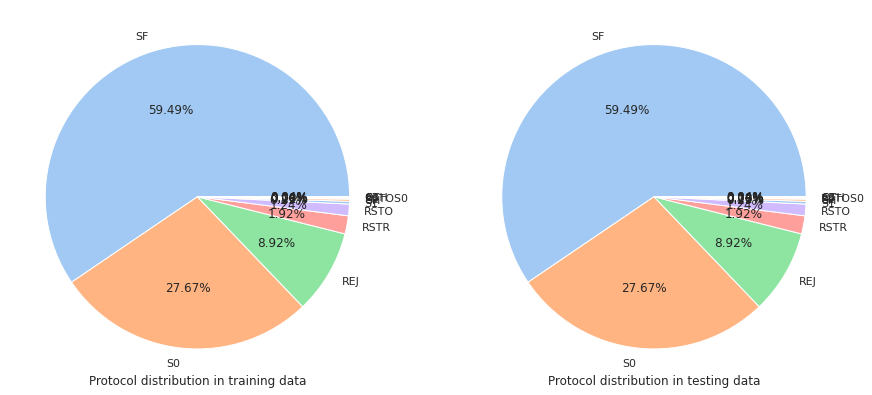

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.pie(fl_tr.values, labels=fl_tr.index, colors=colors, autopct='%.2f%%')
ax1.set_title('Protocol distribution in training data', y=-0.01)

ax2.pie(fl_te.values, labels=fl_te.index, colors=colors, autopct='%.2f%%')
ax2.set_title('Protocol distribution in testing data', y=-0.01)

plt.show()

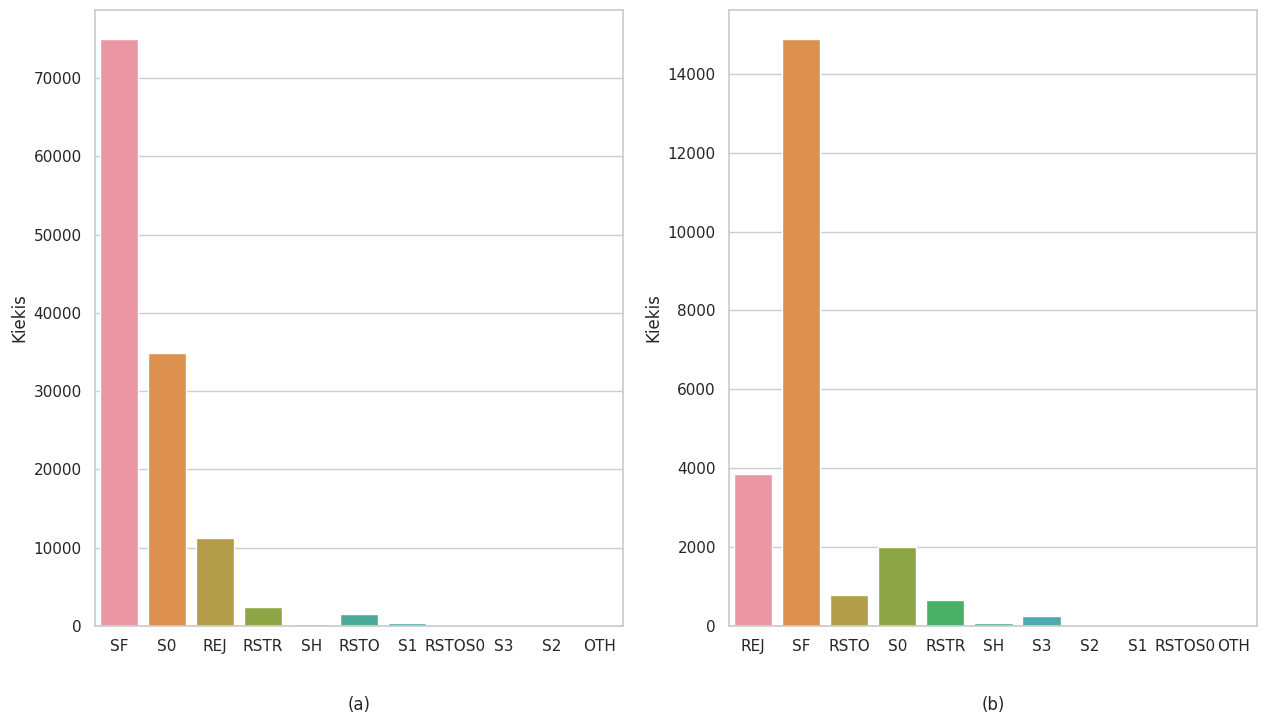

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(x=train_df['flag'], ax=ax1)
ax1.set_title("(a)", y=-0.15)
sns.countplot(x=test_df['flag'], ax=ax2)
ax2.set_title("(b)", y=-0.15)
ax1.set_xlabel("")
ax1.set_ylabel("Kiekis")
ax2.set_xlabel("")
ax2.set_ylabel("Kiekis")

plt.show()

#### Service

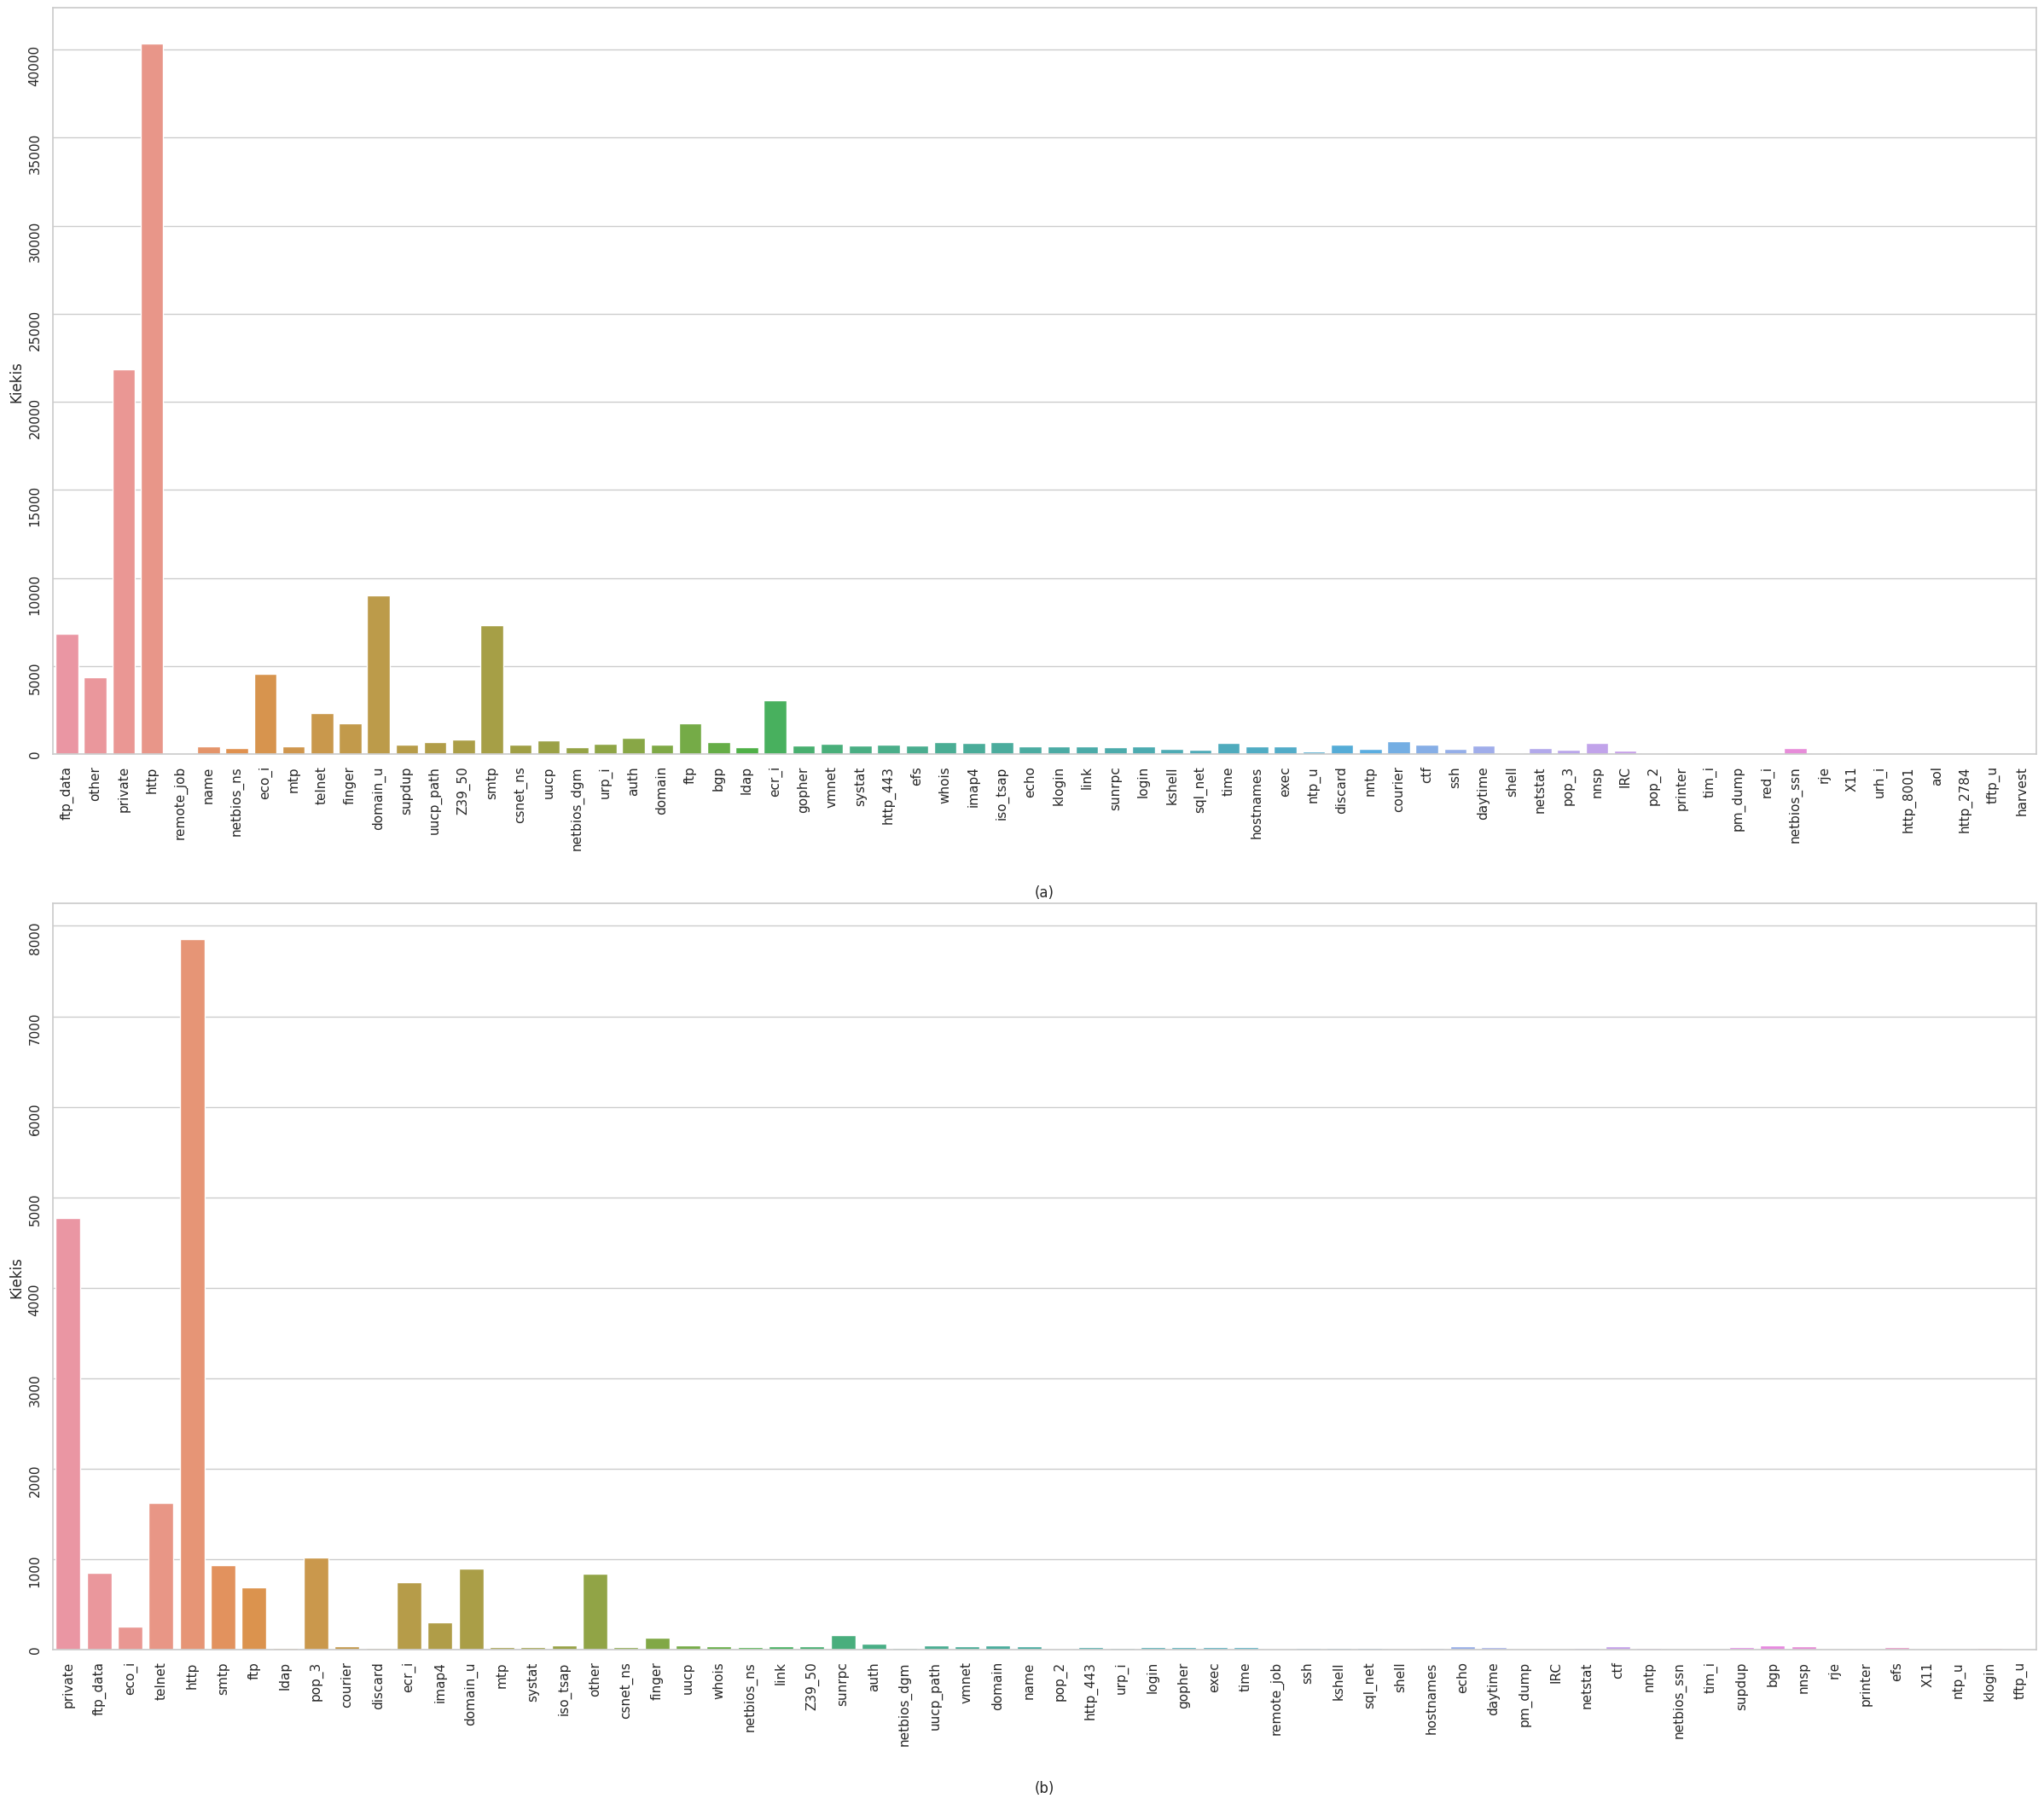

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,25))

sns.countplot(x=train_df['service'], ax=ax1)
ax1.set_title("(a)", y=-0.2)
ax1.tick_params(labelrotation=90)

sns.countplot(x=test_df['service'], ax=ax2)
ax2.set_title("(b)", y=-0.2)
ax2.tick_params(labelrotation=90)

ax1.set_xlabel("")
ax1.set_ylabel("Kiekis")
ax2.set_xlabel("")
ax2.set_ylabel("Kiekis")

plt.show()

## Correlation Analysis

In [ ]:
corr_tr = train_df.drop('num_outbound_cmds', axis=1).corr()
corr_te = test_df.drop('num_outbound_cmds', axis=1).corr()

In [ ]:
def print_highly_correlated(df, features, threshold=0.8):
  corr_df = df[features].corr() # get correlations
  correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
  correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
  s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value

  if s_corr_list == []:
    print("There are no highly correlated features with correlation above", threshold)
  else:
    for v, i, j in s_corr_list:
      cols = df[features].columns
      if corr_df.index[i] != corr_df.columns[j]:
        print("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

print_highly_correlated(corr_tr, corr_tr.columns)

serror_rate and srv_serror_rate = 1.000
rerror_rate and srv_rerror_rate = 1.000
dst_host_serror_rate and dst_host_srv_serror_rate = 1.000
srv_serror_rate and dst_host_srv_serror_rate = 1.000
serror_rate and dst_host_srv_serror_rate = 1.000
serror_rate and dst_host_serror_rate = 1.000
srv_serror_rate and dst_host_serror_rate = 1.000
srv_rerror_rate and dst_host_srv_rerror_rate = 1.000
num_compromised and num_root = 1.000
rerror_rate and dst_host_srv_rerror_rate = 1.000
dst_host_rerror_rate and dst_host_srv_rerror_rate = 0.997
rerror_rate and dst_host_rerror_rate = 0.997
srv_rerror_rate and dst_host_rerror_rate = 0.997
hot and is_guest_login = 0.988
dst_host_srv_count and dst_host_same_srv_rate = 0.981
same_srv_rate and dst_host_same_srv_rate = 0.965
same_srv_rate and dst_host_srv_count = 0.927
logged_in and dst_host_srv_count = 0.924
logged_in and dst_host_same_srv_rate = 0.911
same_srv_rate and dst_host_serror_rate = -0.897
same_srv_rate and dst_host_srv_serror_rate = -0.896
serror_rat

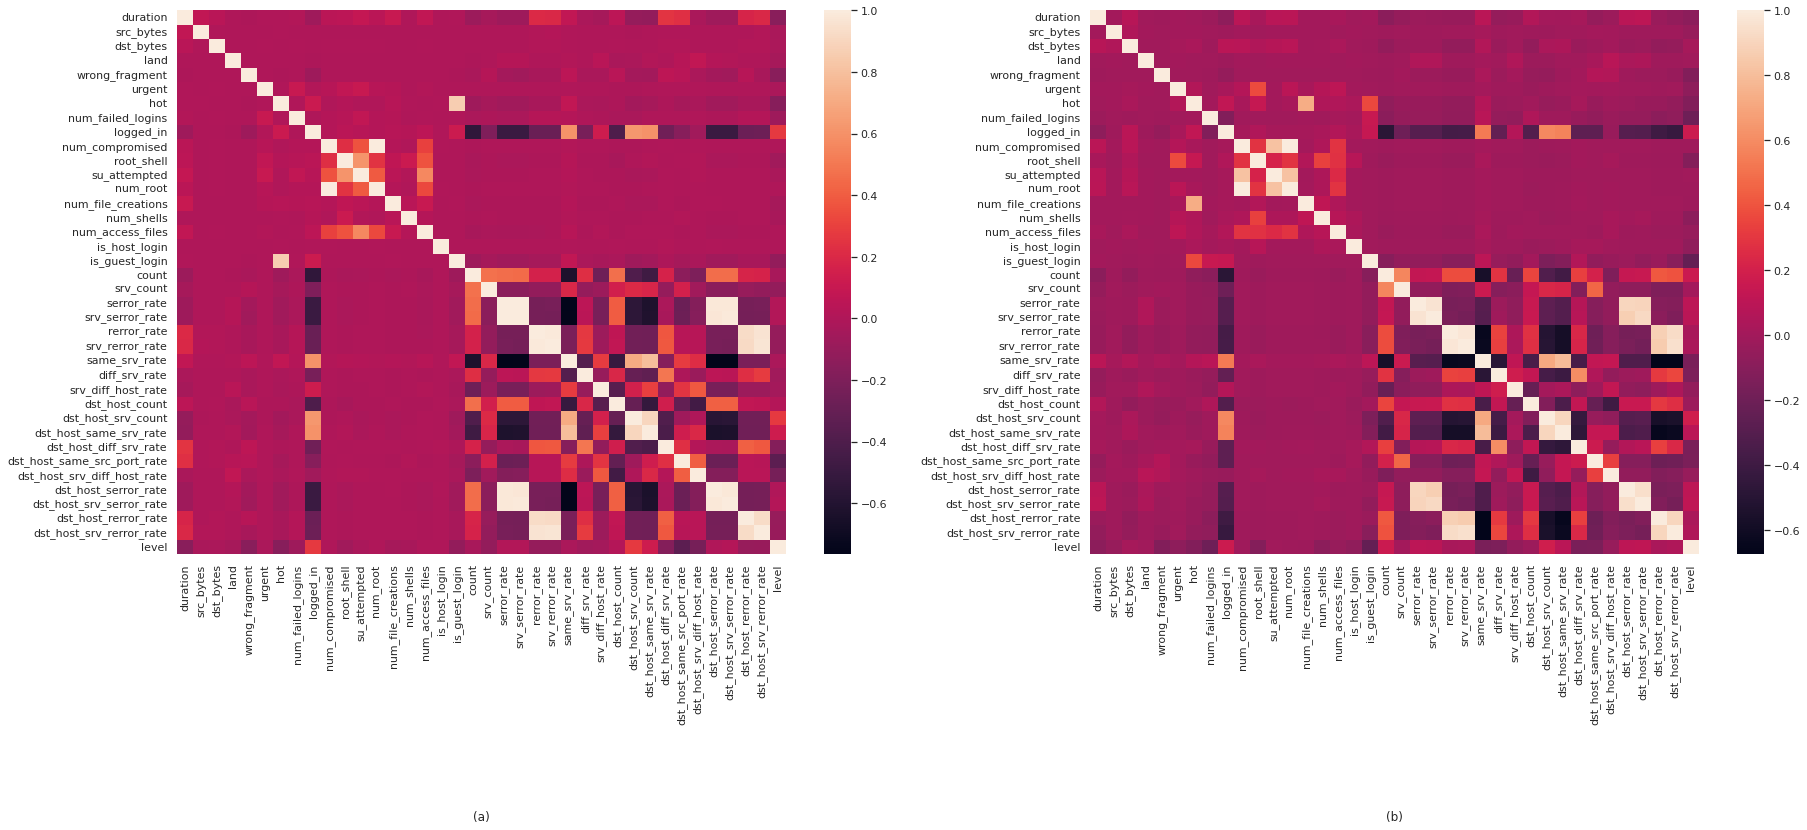

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

sns.heatmap(corr_tr, ax=ax1)
ax1.set_title("(a)", y=-0.5)
sns.heatmap(corr_te, ax=ax2)
ax2.set_title("(b)", y=-0.5)

plt.show()

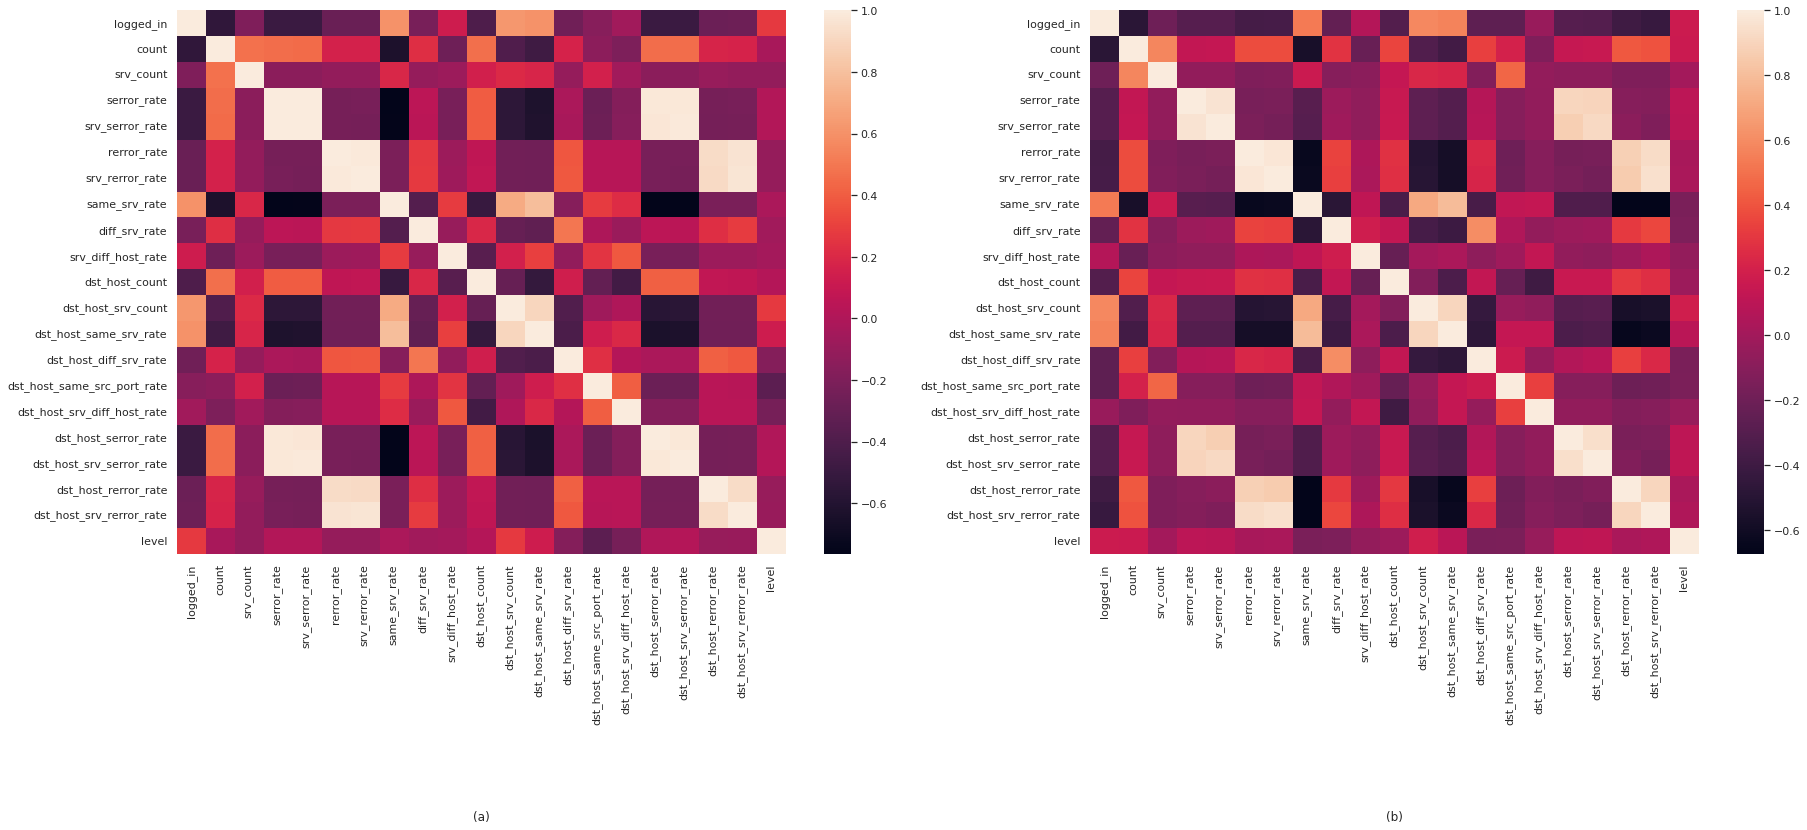

In [ ]:
correlating_features = ['logged_in', 'count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

sns.heatmap(train_df[correlating_features].corr(), ax=ax1)
ax1.set_title("(a)", y=-0.5)
sns.heatmap(test_df[correlating_features].corr(), ax=ax2)
ax2.set_title("(b)", y=-0.5)

plt.show()

## t-SNE analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
tr = train_df.copy(deep=True)

tr['protocol_type'] = LabelEncoder().fit_transform(tr['protocol_type'])
tr['service'] = LabelEncoder().fit_transform(tr['service'])
tr['flag'] = LabelEncoder().fit_transform(tr['flag'])

In [ ]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(tr.drop(['attack', 'attack_binary'], axis=1))

In [ ]:
df = pd.DataFrame({'x':tsne_features[:,0], 'y':tsne_features[:,1]})
df.to_csv(BASE+'tsne_1.csv', index=False)

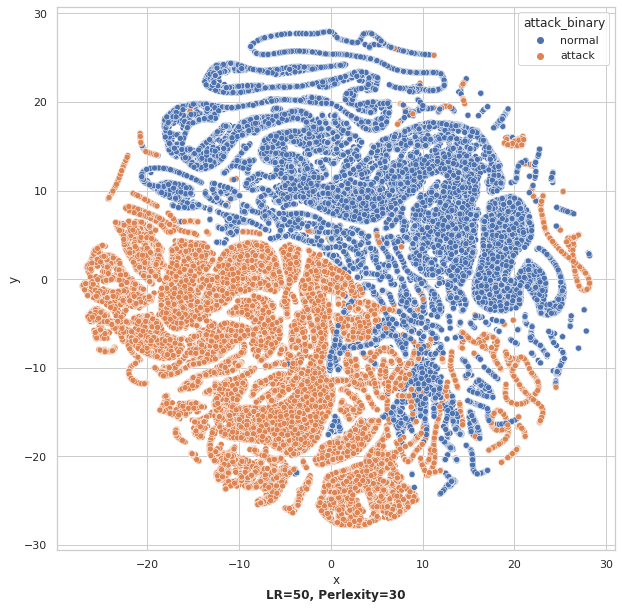

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=train_df.attack_binary)
plt.ylabel('y')
plt.xlabel('x')
plt.title('LR=50, Perlexity=30', weight='bold', y=-0.1)
plt.show()

In [ ]:
m_2 = TSNE(learning_rate=500)

tsne_features_2 = m_2.fit_transform(tr.drop('attack', axis=1))

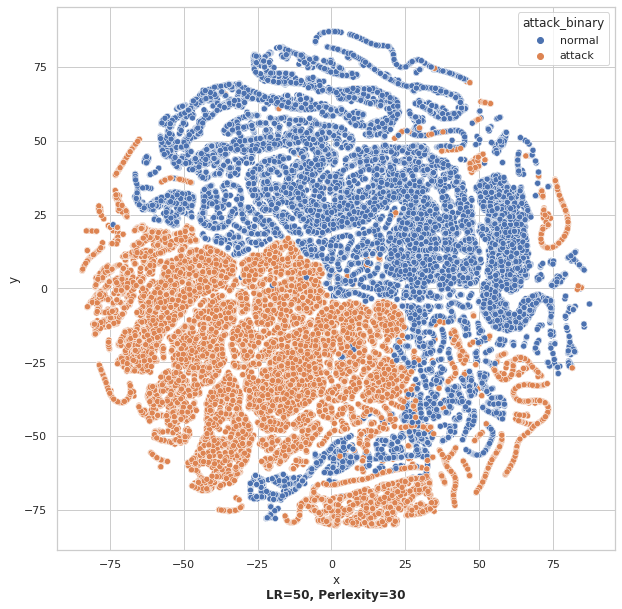

In [ ]:
df = pd.DataFrame({'x':tsne_features_2[:,0], 'y':tsne_features_2[:,1]})
df.to_csv(BASE+'tsne_2.csv', index=False)

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_features_2[:,0], y=tsne_features_2[:,1], hue=train_df.attack_binary)
plt.ylabel('y')
plt.xlabel('x')
plt.title('LR=50, Perlexity=30', weight='bold', y=-0.1)
plt.show()

In [ ]:
m_3 = TSNE(learning_rate=5000)

tsne_features_3 = m_3.fit_transform(tr.drop('attack', axis=1))

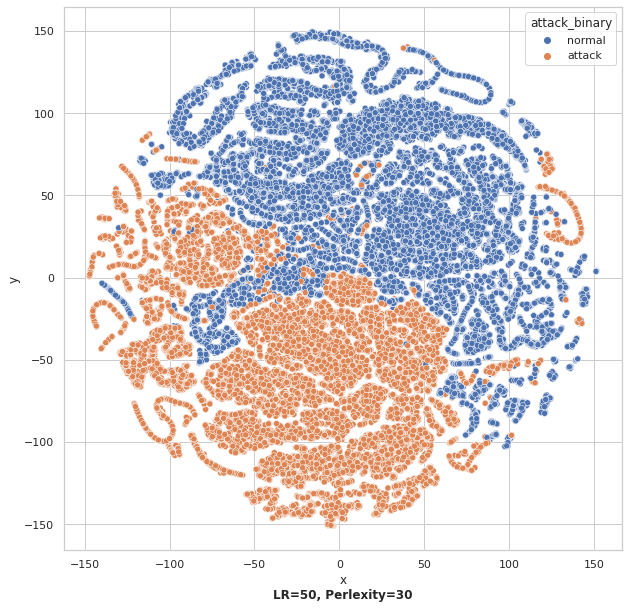

In [ ]:
df = pd.DataFrame({'x':tsne_features_3[:,0], 'y':tsne_features_3[:,1]})
df.to_csv(BASE+'tsne_3.csv', index=False)

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_features_3[:,0], y=tsne_features_3[:,1], hue=train_df.attack_binary)
plt.ylabel('y')
plt.xlabel('x')
plt.title('LR=50, Perlexity=30', weight='bold', y=-0.1)
plt.show()

In [ ]:
m_4 = TSNE(learning_rate=5000, perplexity=100)

tsne_features_4 = m_4.fit_transform(tr.drop('attack', axis=1))

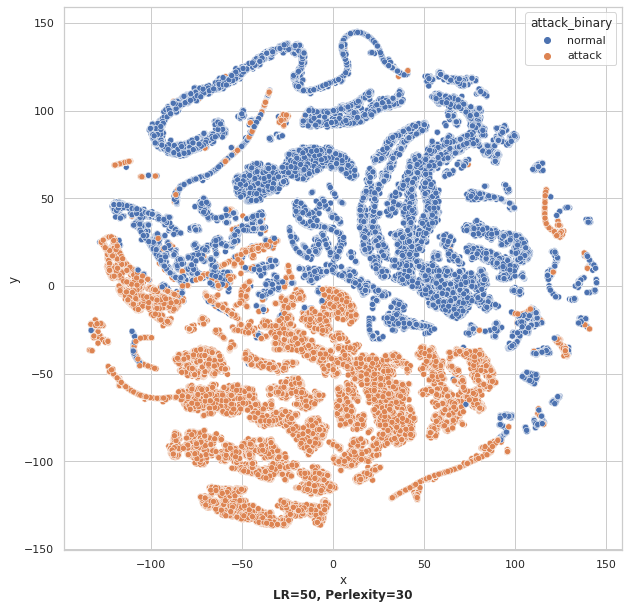

In [ ]:
df = pd.DataFrame({'x':tsne_features_4[:,0], 'y':tsne_features_4[:,1]})
df.to_csv(BASE+'tsne_4.csv', index=False)

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_features_4[:,0], y=tsne_features_4[:,1], hue=train_df.attack_binary)
plt.ylabel('y')
plt.xlabel('x')
plt.title('LR=50, Perlexity=30', weight='bold', y=-0.1)
plt.show()

In [ ]:
df = pd.DataFrame({'x':tsne_features[:,0], 'y':tsne_features[:,1],
                   'x_2':tsne_features_2[:,0], 'y_2':tsne_features_2[:,1],
                   'x_3':tsne_features_3[:,0], 'y_3':tsne_features_3[:,1],
                   'x_4':tsne_features_4[:,0], 'y_4':tsne_features_4[:,1]})

df.to_csv(BASE+'tsne_results.csv')

Text(0.5, -0.001, 'LR=5000, Perlexity=100')

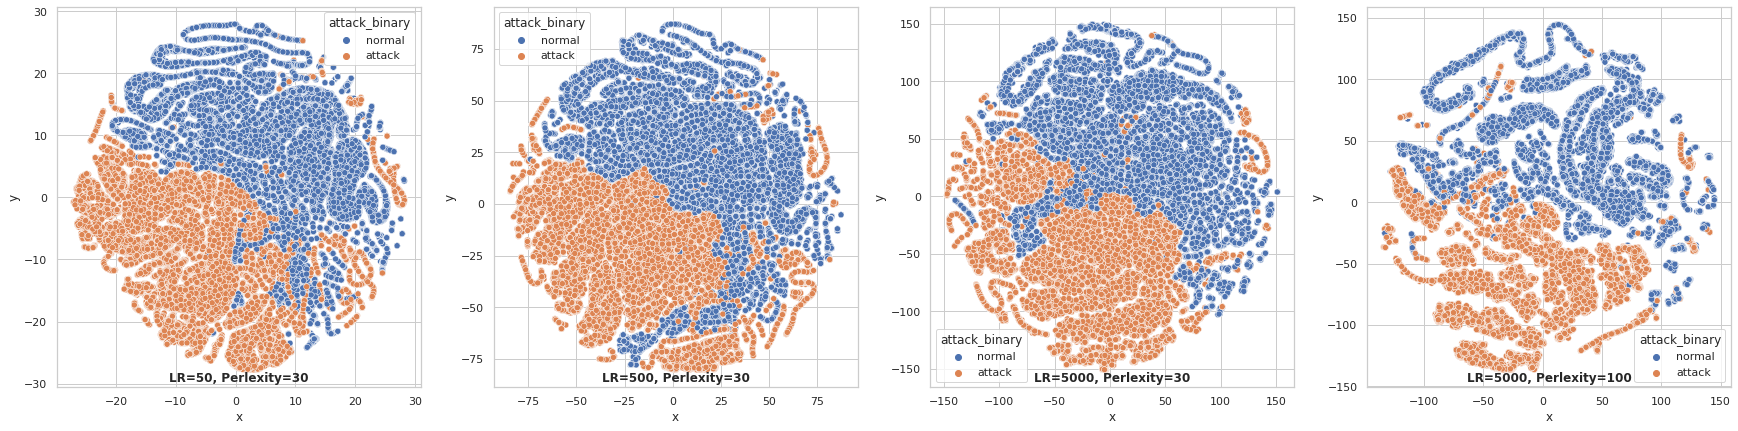

In [ ]:
fig, axes = plt.subplots(1,4,figsize=(30,7))

sns.scatterplot(ax=axes[0], x='x', y='y', data=df, hue=train_df.attack_binary)
axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[0].set_title('LR=50, Perlexity=30', weight='bold', y=-0.001)

sns.scatterplot(ax=axes[1], x='x_2', y='y_2', data=df, hue=train_df.attack_binary)
axes[1].set_ylabel('y')
axes[1].set_xlabel('x')
axes[1].set_title('LR=500, Perlexity=30', weight='bold', y=-0.001)

sns.scatterplot(ax=axes[2], x='x_3', y='y_3', data=df, hue=train_df.attack_binary)
axes[2].set_ylabel('y')
axes[2].set_xlabel('x')
axes[2].set_title('LR=5000, Perlexity=30', weight='bold', y=-0.001)

sns.scatterplot(ax=axes[3], x='x_4', y='y_4', data=df, hue=train_df.attack_binary)
axes[3].set_ylabel('y')
axes[3].set_xlabel('x')
axes[3].set_title('LR=5000, Perlexity=100', weight='bold', y=-0.001)

In [ ]:
m_5 = TSNE(learning_rate=5000, perplexity=250)

tsne_features_5 = m_5.fit_transform(tr.drop('attack', axis=1))

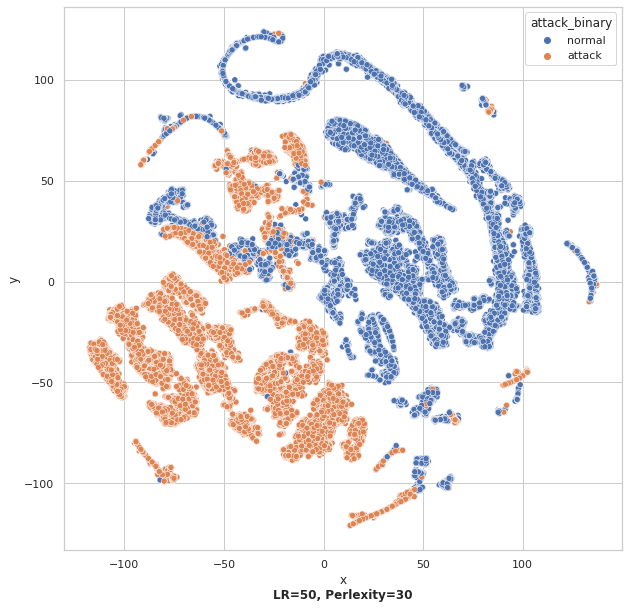

In [ ]:
df = pd.DataFrame({'x':tsne_features_5[:,0], 'y':tsne_features_5[:,1]})
df.to_csv(BASE+'tsne_5.csv', index=False)

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_features_5[:,0], y=tsne_features_5[:,1], hue=train_df.attack_binary)
plt.ylabel('y')
plt.xlabel('x')
plt.title('LR=50, Perlexity=30', weight='bold', y=-0.1)
plt.show()